In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analise Inicial

In [2]:
df_imdb = pd.read_csv('desafio_indicium_imdb.csv', sep=',', header=0, decimal='.', index_col=0)

In [3]:
df_imdb.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


In [4]:
quantidade_linhas, quantidade_colunas = df_imdb.shape
print(f'Quantidade de linhas: {quantidade_linhas}')
print(f'Quantidade de colunas: {quantidade_colunas}')

Quantidade de linhas: 999
Quantidade de colunas: 15


In [5]:
# tipo de dados de cada coluna
print(df_imdb.dtypes)

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [6]:
# Verificando valores ausentes (missing values)
df_imdb.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
df_imdb.describe(include='all')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999,999,898,999,999,999.000000,999,842.000000,999,999,999,999,999,9.990000e+02,830
unique,998,100,16,140,202,NaN,999,NaN,548,659,840,890,938,NaN,822
top,Drishyam,2014,U,100 min,Drama,NaN,An organized crime dynasty's aging patriarch t...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,2,32,234,23,84,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,7.947948,NaN,77.969121,NaN,NaN,NaN,NaN,NaN,2.716214e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,0.272290,NaN,12.383257,NaN,NaN,NaN,NaN,NaN,3.209126e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.547150e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.383560e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.731675e+05,NaN


In [8]:
df_imdb['Series_Title'].value_counts()

Series_Title
Drishyam                  2
Falling Down              1
Cidade de Deus            1
The Muppet Movie          1
The Warriors              1
                         ..
Breakfast at Tiffany's    1
Giant                     1
From Here to Eternity     1
Lifeboat                  1
Pulp Fiction              1
Name: count, Length: 998, dtype: int64

In [9]:
df_imdb.groupby("Released_Year", dropna=False)["Gross"].count()

Released_Year
1920     0
1921     1
1922     0
1924     1
1925     2
        ..
2017    20
2018    14
2019    16
2020     0
PG       1
Name: Gross, Length: 100, dtype: int64

## Tratamento inicial na incocsistencia dos dados

In [10]:
df_imdb_clean = df_imdb.copy()

### Remoção 'Series_Title' duplicados

In [11]:
# Titulo do filme 'Drishyam' com 2 entradas com alguns valores diferentes
df_imdb_clean[df_imdb_clean['Series_Title'] == 'Drishyam']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
136,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


In [12]:
# Remover duplicatas mantendo a ultima ocorrência
df_imdb_clean = df_imdb_clean.drop_duplicates(subset='Series_Title', keep='last')

In [13]:
df_imdb_clean[df_imdb_clean['Series_Title'] == 'Drishyam']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
136,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


In [14]:
df_imdb_clean.shape

(998, 15)

### Transformando Coluna 'Gross' de *object* para *float64*

In [15]:
# Verificar frequência de vírgulas e pontos
conta_ponto = df_imdb_clean["Gross"].astype(str).str.contains(r"\.").sum()
conta_virgula = df_imdb_clean["Gross"].astype(str).str.contains(r",").sum()

In [16]:
print(conta_ponto)
print(conta_virgula)

0
830


In [17]:
# Transformando Coluna 'Gross' de *object* para *float64*
df_imdb_clean['Gross'] = df_imdb_clean['Gross'].str.replace(',', '').astype('float64')

In [18]:
df_imdb_clean.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0


In [19]:
print(df_imdb_clean['Gross'].dtypes)

float64


In [20]:
df_imdb_clean['Gross'].isna().sum()

np.int64(168)

Esse valor de 168, diferente de 169 se deve ao fator de retirarmos a duplicidade do filme *Drishyam* da base de dados, ele tambem possuia **Gross** com *nan*.

### Coluna 'Certificate'

Vamos primeiro analizar a coluna 'Certificate' onde esta a classificação do filme.

In [21]:
# Valores unicos na coluna 'Certificate'
df_imdb_clean['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

Segundo a *(MPAA) - Motion Picture Association of America* filmes com a classificação de **'Unrated'** são aqueles que não submetidos ao sistema de classificação ou são versão sem cortes de filmes que jã foram submetidos. Nesse caso precisamos entender se podemos classificar todos os filmes com classificação nula (ou *nan*) como Unrated.

Tambem percebi que são utilizados 3 sistemas de classificação na coluna 'Certificate' sendo eles:
* Motion Picture Production Code - (Hays Code): Código de Produção que definiu se o conteúdo era aceitável ou inaceitável para filmes produzidos para o público nos Estados Unidos. São parte deles os termos **approved** ou **Passed**.
* Motion Picture Association of America - (MPAA): Sistema de classificações aplicadas a filmes individuais. São eles **G**, **PG** (antigamente **GP**), **PG-13** e **R**.
* Central Board of Film Certification - (CBFC): Órgão estatal de certificação cinematográfica do Ministério da Informação e Radiodifusão do Governo da Índia. Sua função é "regulamentar a exibição pública de filmes". São eles **U** (sem restrição), **U/A** ou **UA** e **A**
* TV Parental Guidelines System: Sistema de Diretrizes Parentais da TV dos Estados Unidos é um sistema de participação voluntária para programas de TV, com classificações a serem determinadas pelas redes de transmissão a cabo e participantes individuais. São eles: **TV-PG**, **TV-14**, **TV-MA**

Apenas o codigo **16**  que não consegui verificar mais detalhadamente tendo apenas 1 filme japones sendo que sua classificação seria **16+** ... Para mais informações achei uma thread a respeito durante minha pesquisa que exemplifica muito bem: https://movies.stackexchange.com/questions/65430/what-are-the-meanings-of-the-terms-passed-and-approved-with-regards-to-a-mov



In [22]:
df_imdb[df_imdb['Certificate'] == '16'].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
197,Koe no katachi,2016,16,130 min,"Animation, Drama, Family",8.1,A young man is ostracized by his classmates af...,78.0,Naoko Yamada,Miyu Irino,Saori Hayami,Aoi Yûki,Kenshô Ono,47708,NaN


Primeiro vamos transformar todos os valores de U/A para UA já que são a mesma coisa, assim como 'Approved' e 'Passed'

In [23]:
# transformar U/A para UA já que são a mesma coisa
df_imdb_clean['Certificate'] = df_imdb_clean['Certificate'].replace('U/A', 'UA')
df_imdb_clean['Certificate'] = df_imdb_clean['Certificate'].replace('Passed', 'Approved')
df_imdb_clean['Certificate'] = df_imdb_clean['Certificate'].replace('GP', 'PG')

In [24]:
df_imdb_clean['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Approved', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'TV-PG'], dtype=object)

*OBS: Poderiamos ter passado os valores da TV/Filmes como *U*, *G* para o mesmo já que são de classificação livre mas precisariamos estudar mais a fundo as nuances de cada classificador, algo que deixarei para o futuro*

In [25]:
df_imdb_clean['Certificate'].value_counts()

Certificate
U           233
A           196
UA          176
R           146
Approved     45
PG-13        43
PG           39
G            12
TV-PG         3
TV-14         1
16            1
TV-MA         1
Unrated       1
Name: count, dtype: int64

Em um primeiro momento vamos utilizar a tecnica de *One-Hot Encoder* para transformar a coluna categorica para numerica. Como a principio não existe uma hierarquia iremos utilizar essa tecnica.

In [26]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='infrequent_if_exist')
OneHotEncoder_colunas_certificate = enc.fit_transform(df_imdb_clean[['Certificate']]).toarray()

# Criando um DataFrame com as colunas do OneHotEncoder
df_cert = pd.DataFrame(OneHotEncoder_colunas_certificate, columns=enc.get_feature_names_out(['Certificate']))

# juntando os dois DataFrames
df_imdb_clean = pd.concat([df_imdb_clean.reset_index(drop=True), df_cert.reset_index(drop=True)], axis=1)

In [27]:
df_imdb_clean.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_UA,Certificate_Unrated,Certificate_nan
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Transformação Coluna 'Runtime'

Podemos transformar a coluna **'Runtime'** de *Object* para *int64* ja que possui o valor do tempo do filme em minutos.

In [28]:
# transformando a coluna 'Runtime' de *object* para *int64*
df_imdb_clean['Runtime'] = df_imdb_clean['Runtime'].str.replace(' min', '').str.strip().astype('int64')

In [29]:
df_imdb_clean['Runtime'].dtypes

dtype('int64')

In [30]:
df_imdb_clean['Runtime'].isna().sum()

np.int64(0)

In [31]:
df_imdb_clean.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_UA,Certificate_Unrated,Certificate_nan
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Colunas 'Stars'

In [32]:
df_imdb_clean[['Star1','Star2','Star3','Star4']] = df_imdb_clean[['Star1','Star2','Star3','Star4']].apply(lambda x: x.str.strip())

In [33]:
count_artist = df_imdb_clean[['Star1','Star2','Star3','Star4']].melt().value.value_counts()
count_artist[count_artist > 6]

value
Robert De Niro        17
Tom Hanks             14
Al Pacino             13
Brad Pitt             12
Clint Eastwood        12
Christian Bale        11
Leonardo DiCaprio     11
Matt Damon            11
James Stewart         10
Scarlett Johansson     9
Denzel Washington      9
Humphrey Bogart        9
Johnny Depp            9
Ethan Hawke            9
Michael Caine          9
Harrison Ford          8
Aamir Khan             8
Robert Downey Jr.      7
Toshirô Mifune         7
Tom Cruise             7
Jake Gyllenhaal        7
Bruce Willis           7
Ian McKellen           7
Emma Watson            7
Mark Ruffalo           7
Jeff Bridges           7
Cary Grant             7
Edward Norton          7
Russell Crowe          7
Name: count, dtype: int64

In [34]:
print(count_artist[count_artist > 6].shape[0])
print(count_artist[count_artist > 5].shape[0])
print(count_artist[count_artist > 4].shape[0])

29
59
79


In [35]:
artist_freq = count_artist[count_artist > 6].index.tolist()

In [36]:
artist_freq

['Robert De Niro',
 'Tom Hanks',
 'Al Pacino',
 'Brad Pitt',
 'Clint Eastwood',
 'Christian Bale',
 'Leonardo DiCaprio',
 'Matt Damon',
 'James Stewart',
 'Scarlett Johansson',
 'Denzel Washington',
 'Humphrey Bogart',
 'Johnny Depp',
 'Ethan Hawke',
 'Michael Caine',
 'Harrison Ford',
 'Aamir Khan',
 'Robert Downey Jr.',
 'Toshirô Mifune',
 'Tom Cruise',
 'Jake Gyllenhaal',
 'Bruce Willis',
 'Ian McKellen',
 'Emma Watson',
 'Mark Ruffalo',
 'Jeff Bridges',
 'Cary Grant',
 'Edward Norton',
 'Russell Crowe']

In [37]:
df_artist_melted = df_imdb_clean.melt(value_vars=["Star1", "Star2", "Star3", "Star4"], var_name="Star", value_name="Artista", ignore_index=False)

In [38]:
df_artist_melted

,Star,Artista
0,Star1,Marlon Brando
1,Star1,Christian Bale
2,Star1,Al Pacino
3,Star1,Henry Fonda
4,Star1,Elijah Wood
...,...,...
993,Star4,Buddy Ebsen
994,Star4,Carroll Baker
995,Star4,Donna Reed
996,Star4,William Bendix


### Coluna 'Released_Year'

In [39]:
df_imdb_clean['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2005', '2004', '1992', '1987', '1986', '1983',
       '1976', '1973', '1965', '1959', '1958', '1952', '1948', '1944',
       '1941', '1927', '1921', '2015', '2013', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [40]:
df_imdb_clean[df_imdb_clean['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_UA,Certificate_Unrated,Certificate_nan
964,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
# Subistituir valore incorreto na coluna 'Released_Year' de PG para 1995, segundo o site IMDb https://www.imdb.com/pt/title/tt0112384/
df_imdb_clean.loc[df_imdb_clean["Released_Year"] == "PG", "Released_Year"] = 1995

In [42]:
df_imdb_clean.iloc[964]["Released_Year"]

1995

In [43]:
df_imdb_clean['Released_Year'] = df_imdb_clean['Released_Year'].astype('int64')

### Coluna 'Director'

In [44]:
df_imdb_clean['Director'] = df_imdb_clean['Director'].str.strip()

In [45]:
df_imdb_clean['Director'].unique().shape

(547,)

# Retomando analise

## Artistas

In [46]:
count_artist

value
Robert De Niro    17
Tom Hanks         14
Al Pacino         13
Brad Pitt         12
Clint Eastwood    12
                  ..
Éric Toledano      1
Doug McKeon        1
Max Phipps         1
Brian Tyler        1
Richard Hunt       1
Name: count, Length: 2703, dtype: int64

In [47]:
# Quantidade de artistas únicos
count_artist.shape[0]

2703

In [48]:
top_29_categories = df_artist_melted['Artista'].value_counts().iloc[:29].index
df_artist_count_plot = df_artist_melted[df_artist_melted['Artista'].isin(top_29_categories)]

In [49]:
print(f"Média de filmes atuados por artista {df_artist_melted.groupby('Artista').count()['Star'].mean():.2f}")
print(f"Mediana de filmes atuados por artista {df_artist_melted.groupby('Artista').count()['Star'].median():.2f}")

Média de filmes atuados por artista 1.48
Mediana de filmes atuados por artista 1.00


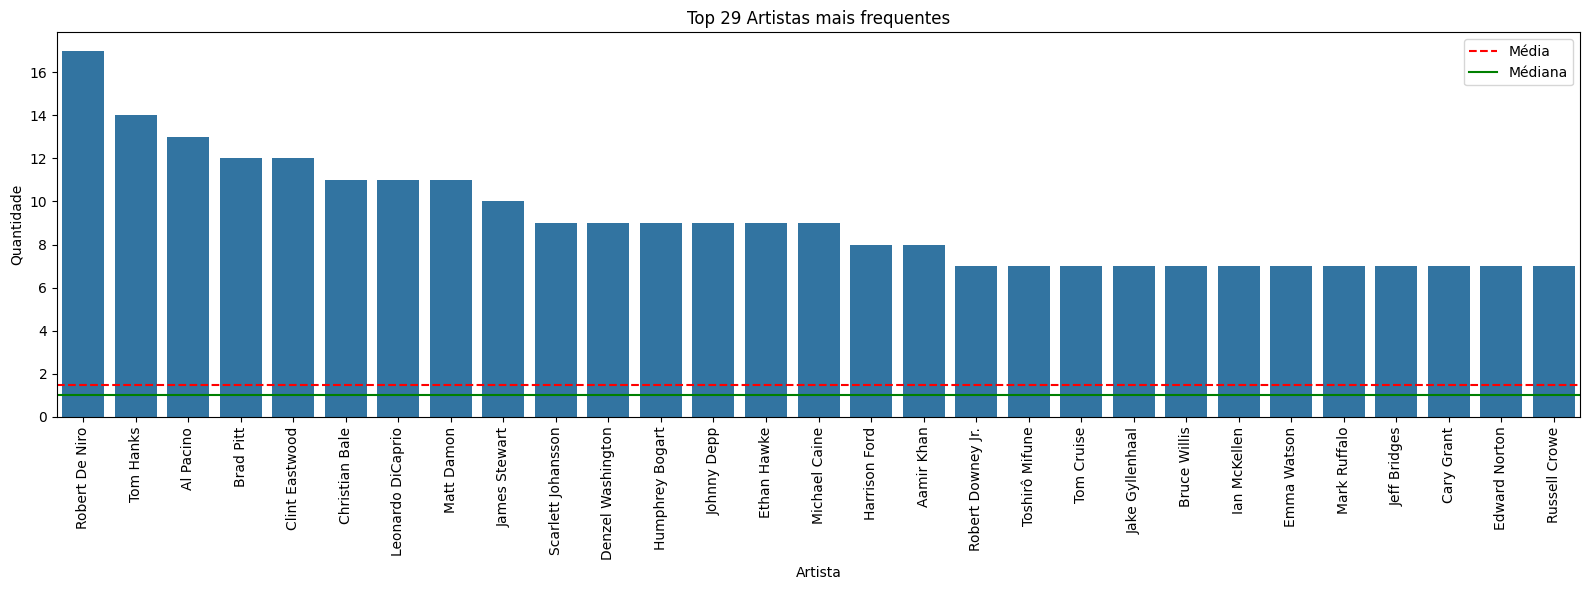

In [50]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(data=df_artist_count_plot, x='Artista', order=top_29_categories)
plt.xticks(rotation=90)
plt.title('Top 29 Artistas mais frequentes')
plt.xlabel('Artista')
plt.ylabel('Quantidade')
plt.axhline(df_artist_melted.groupby('Artista').count()['Star'].mean(), color='red', linestyle='--', label='Média')
plt.axhline(df_artist_melted.groupby('Artista').count()['Star'].median(), color='green', linestyle='-', label='Médiana')
plt.legend()
plt.tight_layout()
plt.show()

No grafico acima conseguimos observar a quantidade de filmes por artista. Vemos que o ator **Robert De Niro** atual em mais de 16 filmes, sendo o ator que mais participou nessa base de dados. A *Média* e *Mediana* estão bem afastadas do top 29. No grafico abaixo fica evidente a distribuição de participação de atores em filmes/series, a maioria esmagadora teve apenas 1 participação em algum filme e apenas poucos tiveram mais de 4 participações levando o grafico a uma assimétria à direita ou assimetria positiva.

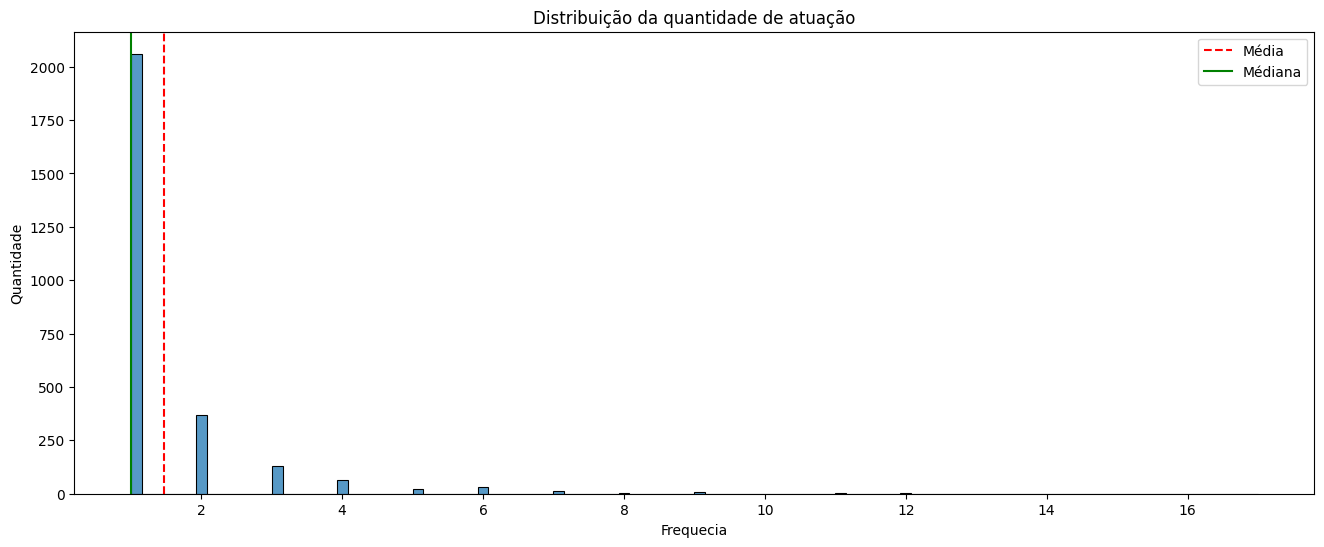

In [51]:
# histograma da contagem de filmes por artista e boxplot
plt.Figure(figsize=(16, 6))

fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(df_artist_melted.groupby('Artista').count()['Star'])
plt.title('Distribuição da quantidade de atuação')
plt.xlabel('Frequecia')
plt.ylabel('Quantidade')
plt.axvline(df_artist_melted.groupby('Artista').count()['Star'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df_artist_melted.groupby('Artista').count()['Star'].median(), color='green', linestyle='-', label='Médiana')
plt.legend()
plt.show()

### Por Classificação

In [52]:
df_artist_certification_melted = df_imdb_clean.melt(id_vars='Certificate',value_vars=["Star1", "Star2", "Star3", "Star4"], var_name="Star", value_name="Artista")
tabela = pd.crosstab(df_artist_certification_melted["Artista"], df_artist_certification_melted["Certificate"])

In [53]:
top30 = tabela.sum(axis=1).sort_values(ascending=False).head(30)

# filtrar a tabela original só para esses 30 artistas
tabela_top30 = tabela.loc[top30.index]
tabela_top30

Certificate,16,A,Approved,G,PG,PG-13,R,TV-14,TV-MA,TV-PG,U,UA,Unrated
Artista,,,,,,,,,,,,,
Robert De Niro,0,11,0,0,0,0,2,0,0,0,3,1,0
Tom Hanks,0,3,0,0,0,0,1,0,0,0,5,5,0
Al Pacino,0,8,0,0,0,0,2,0,0,0,1,2,0
Brad Pitt,0,7,0,0,0,1,0,0,0,0,0,4,0
Clint Eastwood,0,7,0,0,1,0,1,0,0,0,2,1,0
Christian Bale,0,3,0,0,0,0,1,0,0,0,2,5,0
Leonardo DiCaprio,0,8,0,0,0,0,0,0,0,0,1,2,0
Matt Damon,0,2,0,0,0,1,1,0,0,0,2,5,0
Scarlett Johansson,0,1,0,0,0,0,1,0,0,0,2,5,0


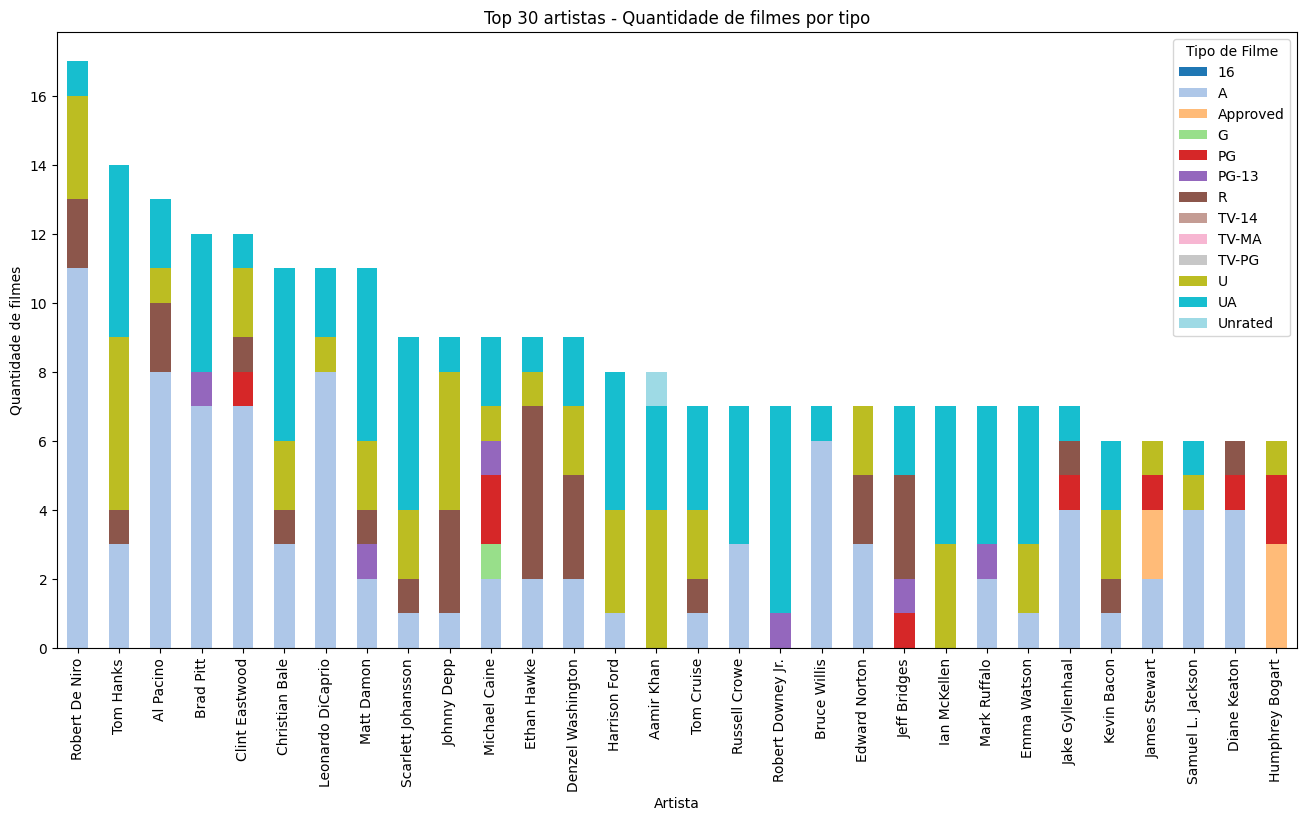

In [54]:
# gráfico de barras empilhadas
tabela_top30.plot(kind="bar", stacked=True, figsize=(16,8), colormap='tab20')
plt.title("Top 30 artistas - Quantidade de filmes por tipo")
plt.xlabel("Artista")
plt.ylabel("Quantidade de filmes")
plt.legend(title="Tipo de Filme")
plt.xticks(rotation=90)
plt.show()

Acima conseguimos observar quanto cada classificação representa no trabalho de cada artista. Vemos que no top 30 artista que apenas os atores **Humphrey Bogart** e **James Stewart** possuem filmes com classificação <u>Approved</u>, isso se deve principalmente por serem atores *"antigos"* que tiveram seus trabalhos classificados na era *Hays Code*. *Bogart* trabalhou em filmes como *Casablanca* (1942), *Uma Aventura na África* (1951) e *O Falcão Maltês* (1941), já **Stewart** com *Um Corpo que Cai* (1958), *Anatomia de um Crime* (1959) e *A Felicidade Não se Compra* (1946).

Vemos que o ator com mais clarrificação <u>R</u> é **Ethan Hawke**. **Bruce Willis** teve majoritariamente seus filmes classificados como <u>A</u>, ou adultos segundo a classificação indiana.

Essa mistura de classificações acaba por confundir como tratar um filme já que cada classificação é relacionada a cultura de cada país, tendo alguns filmes sendo direcionado para o publico restritamente adulto em um lugar mas podendo ser visto por adolescentes com a supervisão de adultos em outro lugar.

### Por Arrecadação

In [55]:
# quanto cada artista tem de Gross acumulado
df_artist_gross_melted = df_imdb_clean.melt(id_vars='Gross',value_vars=["Star1", "Star2", "Star3", "Star4"], var_name="Star", value_name="Artista").dropna()
df_top30_sum_gross_artist = df_artist_gross_melted.dropna().groupby('Artista')[['Gross']].sum().sort_values(by='Gross', ascending=False).head(30)

In [56]:
mean_artist_gross = df_artist_gross_melted.groupby('Artista')[['Gross']].sum()['Gross'].mean()
median_artist_gross = df_artist_gross_melted.groupby('Artista')[['Gross']].sum()['Gross'].median()

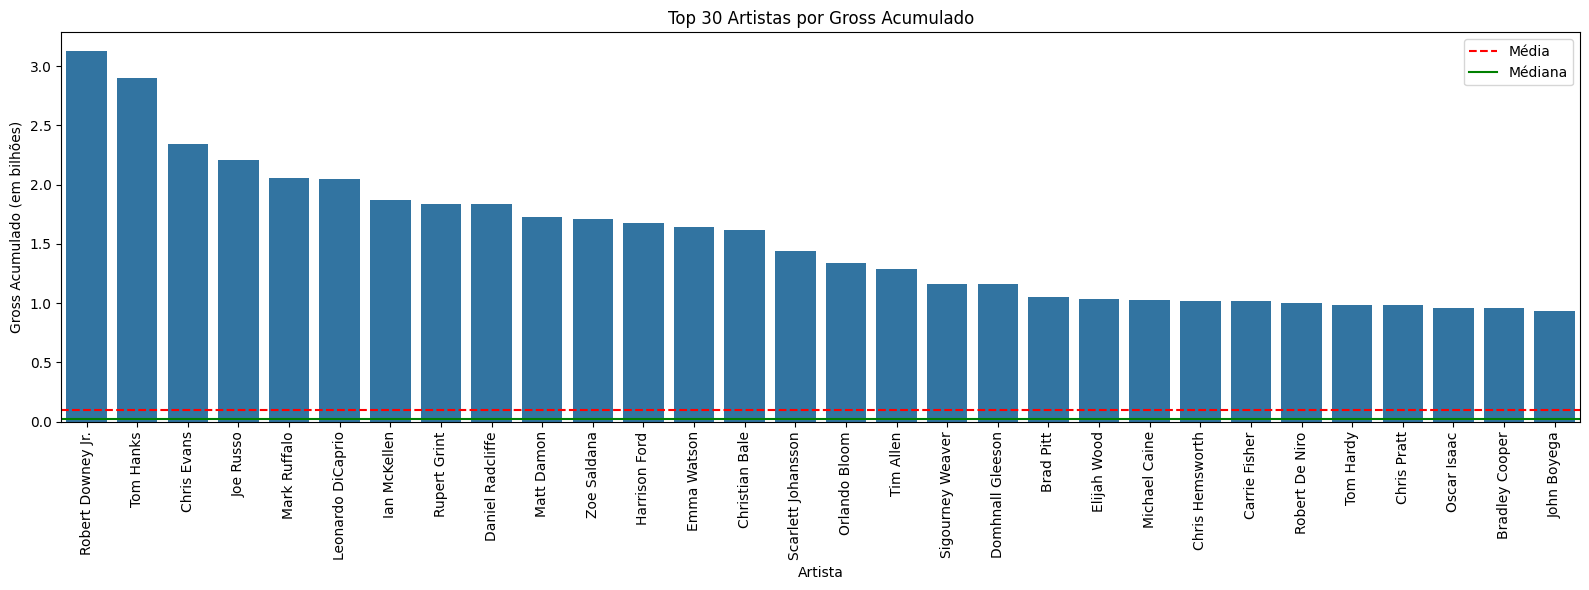

In [57]:
# plotar gráfico de barras
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=df_top30_sum_gross_artist, x='Artista', y='Gross', estimator=sum)
plt.title('Top 30 Artistas por Gross Acumulado')
plt.xticks(rotation=90)
plt.xlabel('Artista')
plt.ylabel('Gross Acumulado (em bilhões)')
ax.yaxis.offsetText.set_visible(False)
ax.axhline(mean_artist_gross, color='red', linestyle='--', label='Média')
ax.axhline(median_artist_gross, color='green', linestyle='-', label='Médiana')
plt.legend()
plt.tight_layout()
plt.show()

No grafico acima podemos ver que os top 30 artistas com os maiores faturamentos em seus filmes, não siginifica os ganhos pelo artista mas a soma de faturamento dos filmes em que participou. Para a analise retirei os valores **NaN** para não atrapalhar nos calculos da *Média* e *Mediana*. Como podemos ver existe uma diferença grande quando tracamos as linhas da média e mediana, isso pode sinalizar que existe muitos artistas com filmes de faturamento baixo. Para melhor analise podemos utilizar a função *describe()*  e plotarmos um *Boxplot()*.

In [58]:
df_artist_gross_melted.groupby('Artista')[['Gross']].sum().sort_values(by='Gross', ascending=False).describe().map(lambda x: f"{x:,.0f}")

,Gross
count,"2,264"
mean,"99,838,404"
std,"225,873,608"
min,"1,305"
25%,"2,537,520"
50%,"20,452,714"
75%,"104,454,762"
max,"3,129,073,242"


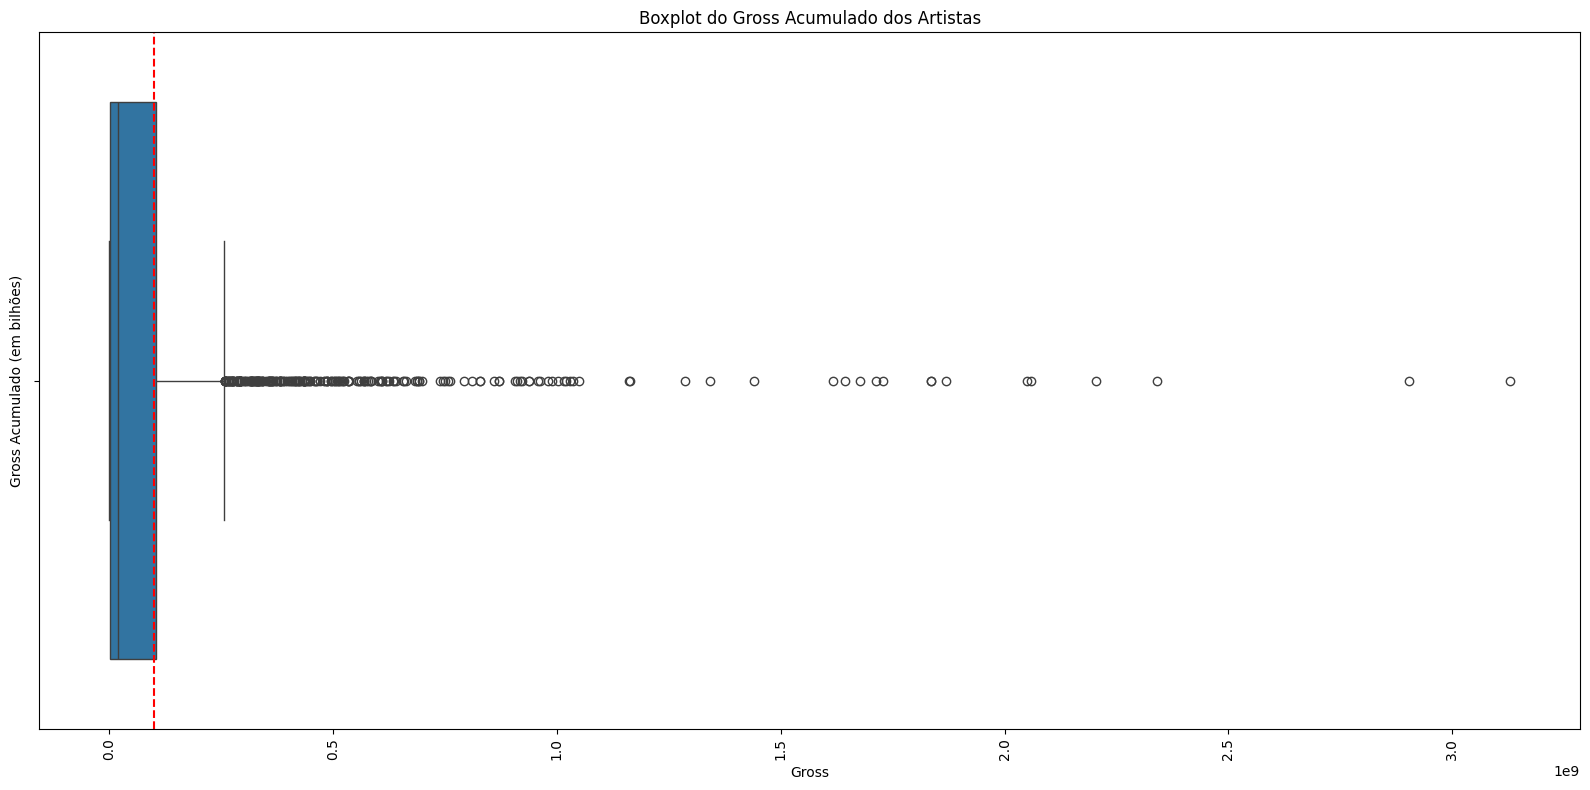

In [59]:
# boxplot do Gross por artista
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_artist_gross_melted.dropna().groupby('Artista')[['Gross']].sum().sort_values(by='Gross', ascending=False), x='Gross')
plt.xticks(rotation=90)
plt.axvline(mean_artist_gross, color='r', linestyle='--')
# plt.axvline(median_artist_gross, color='g', linestyle='-')
plt.title('Boxplot do Gross Acumulado dos Artistas')
plt.ylabel('Gross Acumulado (em bilhões)')
plt.tight_layout()
plt.show()

Acima tanto utilizando *describe()* quanto plotando um *Boxplot* conseguimos percerber um grande desequilibrio na distribuição dos dados com assimétricos à direita ou assimetria positiva com muitos **outliers**.

## Ano de Lançamento

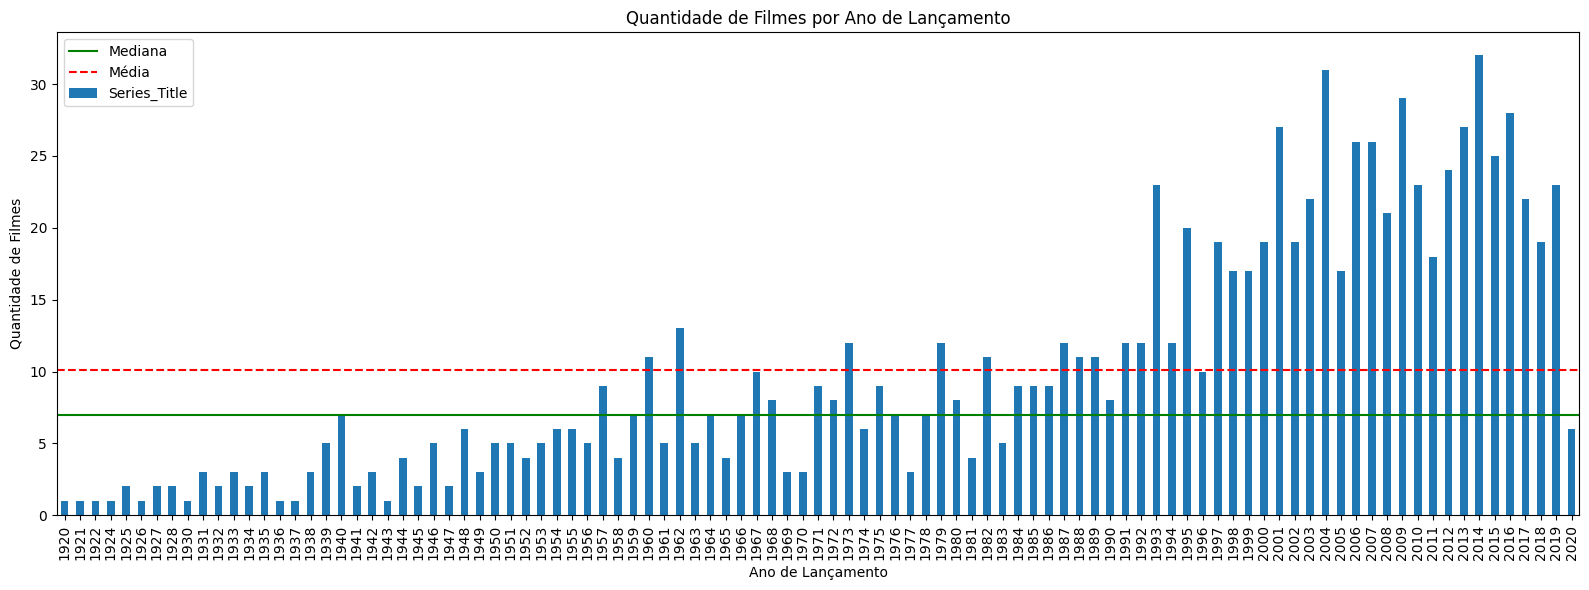

In [60]:
df_imdb_clean.groupby('Released_Year').count()['Series_Title'].plot(kind='bar', figsize=(16, 6))
plt.title('Quantidade de Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Filmes')
plt.axhline(df_imdb_clean.groupby('Released_Year').count()['Series_Title'].median(), color='g', linestyle='-', label='Mediana')
plt.axhline(df_imdb_clean.groupby('Released_Year').count()['Series_Title'].mean(), color='r', linestyle='--', label='Média')
plt.legend()
plt.tight_layout()
plt.show()

A analise dos graficos de barras e de Boxplot nos ajuda a encontrar alguns *insights* interresantes. Para o grafico de barras podemos ver sua distribuição de quantos filmes/series foram lançados nos anos. Conseguimos ver que a mediana de lançamentos é de 7 filmes/series por ano e a média é de aproximadamente 10 filmes/series por ano. Podemos perceber uma distribubição com desequilibrio para a esquerda, assinalando uma assimetria negativa, com alguns filmes muito antigos.

No grafico de Boxplot podemos verificar sua distribuição com seus respectivos *outliers*. Nela percemos que 50% dos lançamenstos se resume de 1999 - 2020, ou seja em 21 anos foram lançados a mesma quantidade de filmes de 79 anos contemplando 1920 - 1999. Uma das causas pode estar relacionadas a popularização do cinema/tv/stream como o avanço de tecnologias cinematograficas e seu barateamento.

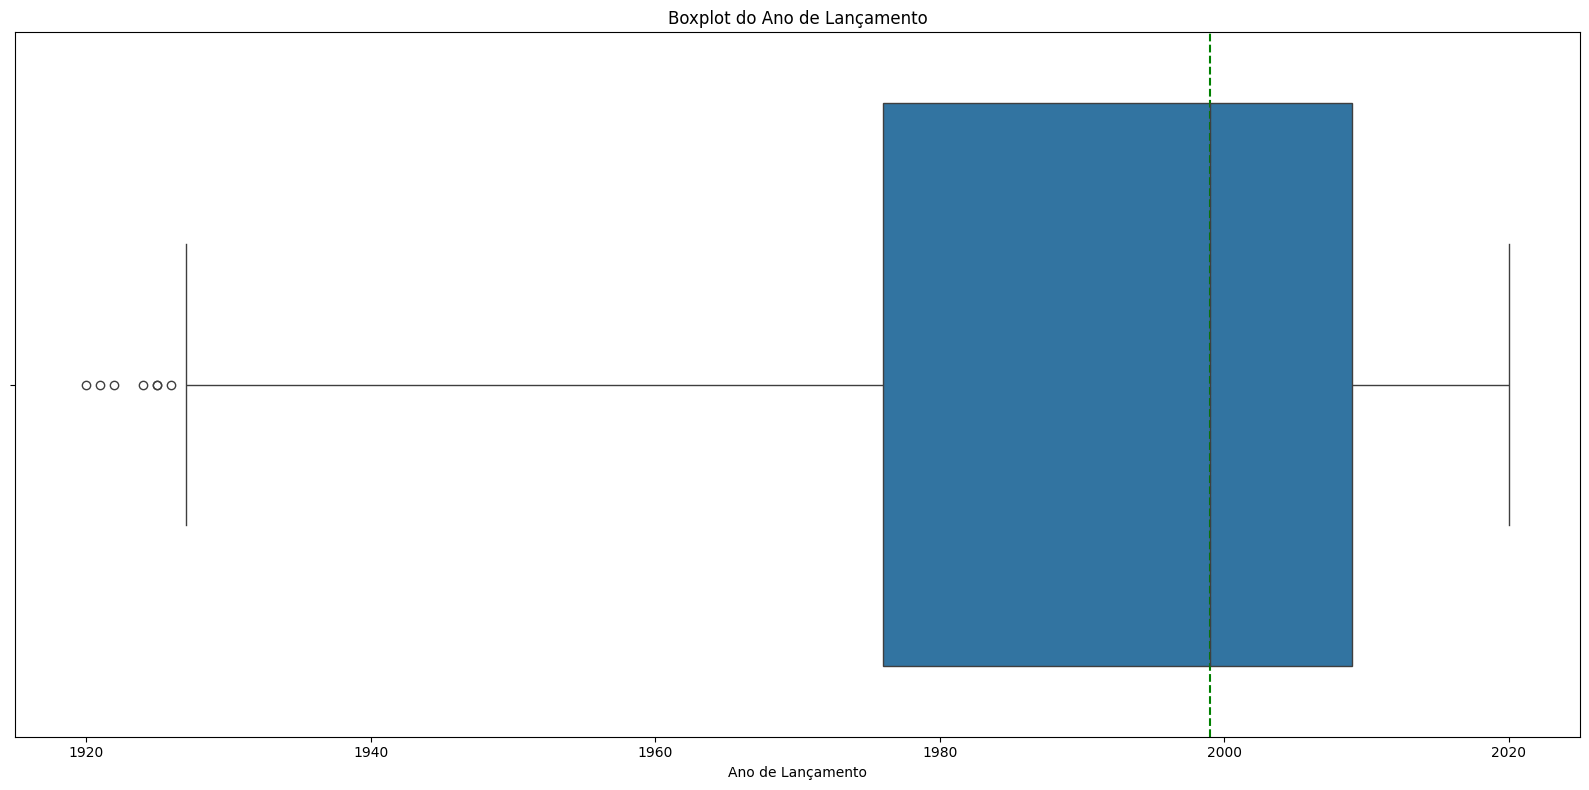

In [61]:
# Boxplot do Ano de Lançamento
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_imdb_clean, x='Released_Year')
plt.title('Boxplot do Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.axvline(df_imdb_clean['Released_Year'].median(), color='g', linestyle='--', label='Mediana')
plt.tight_layout()
plt.show()

### Por Classificação

In [62]:
df_mpaa_hays = df_imdb_clean[df_imdb_clean["Certificate"].isin(['G','PG','PG-13','R','16','Approved','Unrated'])].dropna(subset=["Released_Year", "Certificate"])
df_cbfc_indian = df_imdb_clean[df_imdb_clean["Certificate"].isin(['U','A','UA'])].dropna(subset=["Released_Year", "Certificate"])
df_tv_parental = df_imdb_clean[df_imdb_clean["Certificate"].isin(['TV-PG','TV-14','TV-MA'])].dropna(subset=["Released_Year", "Certificate"])

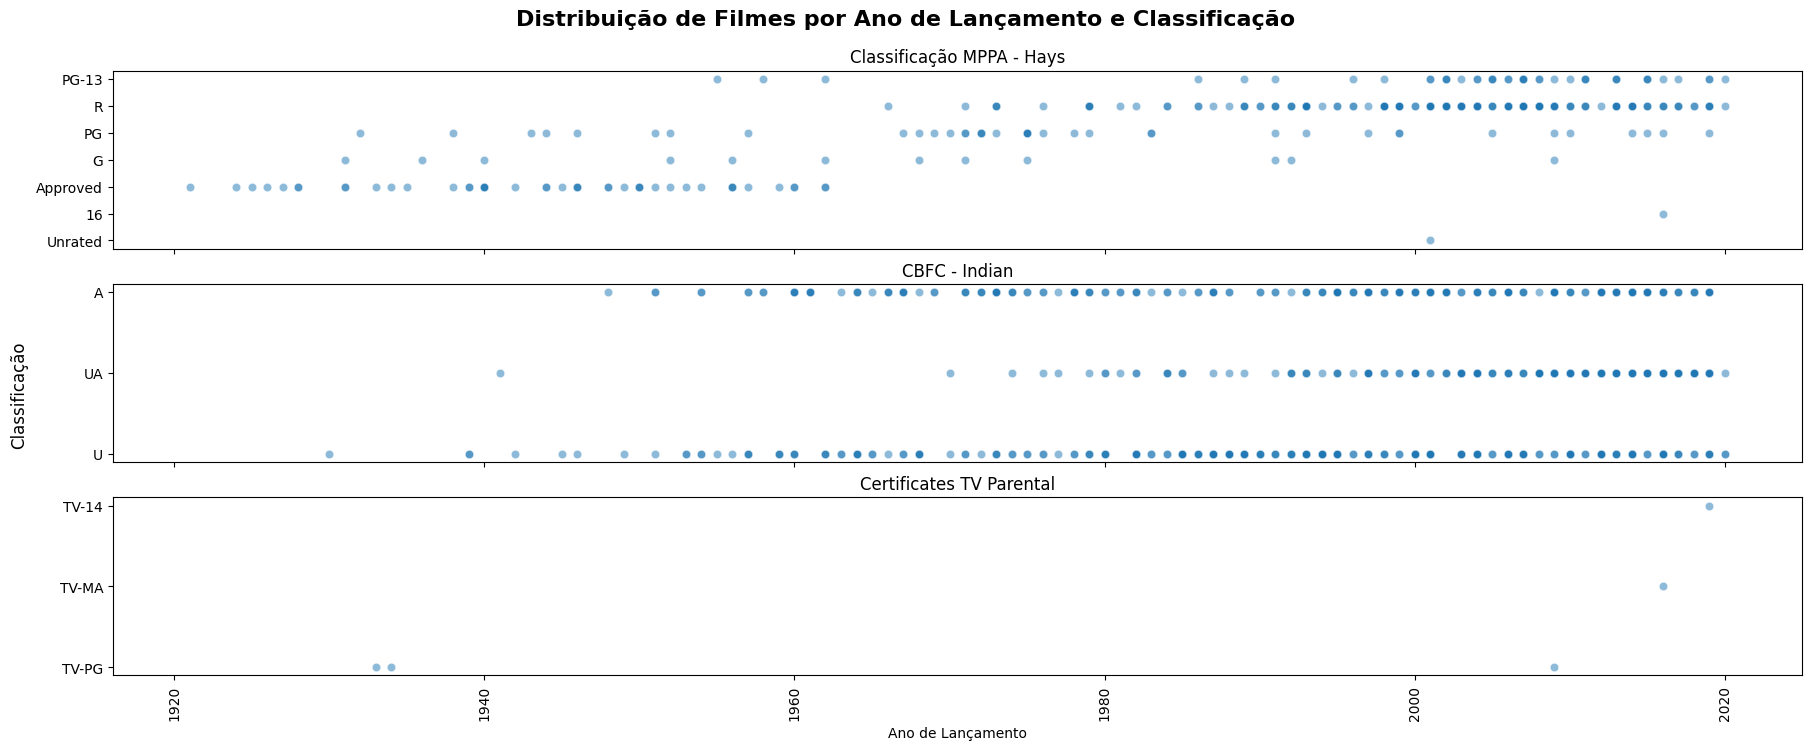

In [63]:
fig, axes = plt.subplots(3, 1, figsize=(18, 7), sharex=True, constrained_layout=True)

fig.suptitle('Distribuição de Filmes por Ano de Lançamento e Classificação', fontsize=16, fontweight='bold', y=1.05)

sns.scatterplot(data=df_mpaa_hays, x="Released_Year", y="Certificate", alpha=0.5, ax=axes[0])
axes[0].set_title("Classificação MPPA - Hays")
axes[0].set_xlabel("Ano de Lançamento")
axes[0].set_ylabel(None)

sns.scatterplot(data=df_cbfc_indian, x="Released_Year", y="Certificate", alpha=0.5, ax=axes[1])
axes[1].set_title("CBFC - Indian")
axes[1].set_xlabel("Ano de Lançamento")
axes[1].set_ylabel(None)

sns.scatterplot(data=df_tv_parental, x="Released_Year", y="Certificate", alpha=0.5, ax=axes[2])
axes[2].set_title("Certificates TV Parental")
axes[2].set_xlabel("Ano de Lançamento")
axes[2].tick_params(axis="x", rotation=90)
axes[2].set_ylabel(None)

fig.supylabel("Classificação")

plt.show()

Criando um *scatterplot* dos anos com cada classificação podemos verificar alguns padrões logo de cara.

* Para o plot com a classificação *MPAA - Hays* conseguimos verificar que o sistema **Hays** foi bastante utilizado na primeiras decadas, juntamente com um pouco do sistema atual da **MPAA** passando por sua substituição nas decadas seguintes. As classificações do tipo **R** Aparecem com bastante destaque entre os inicios dos anos 1980 ate 2020, tendo os filmes do tipo **PG-13** com mais destaque depois dos anos 2000. <u>**Obs**</u>: Coloquei a classificação 16 no mesmo grafico mas não apresenta uma mudança dratisca.

* A classificação dos filmes indianos seguem um padrão mais recorrente para as 3 classificações, tendo o tipo **UA** ocorrendo mais vezes a partir de 1970.

*  Qquanto a classificação TV não tivemos muitos *insights* pela baixa quantidade na base de dados.

### Por Arrecadação

In [64]:
df_line_year_gross = df_imdb_clean.dropna(subset=['Gross']).groupby('Released_Year')[['Gross']].sum()

In [65]:
df_line_year_gross

,Gross
Released_Year,
1921,5.450000e+06
1924,9.773750e+05
1925,5.500970e+06
1926,1.033895e+06
1927,1.775706e+06
...,...
2015,2.462337e+09
2016,2.595557e+09
2017,2.061313e+09


In [66]:
df_imdb_clean[df_imdb_clean['Released_Year'] == 2020]['Gross']

17    NaN
19    NaN
203   NaN
462   NaN
610   NaN
611   NaN
Name: Gross, dtype: float64

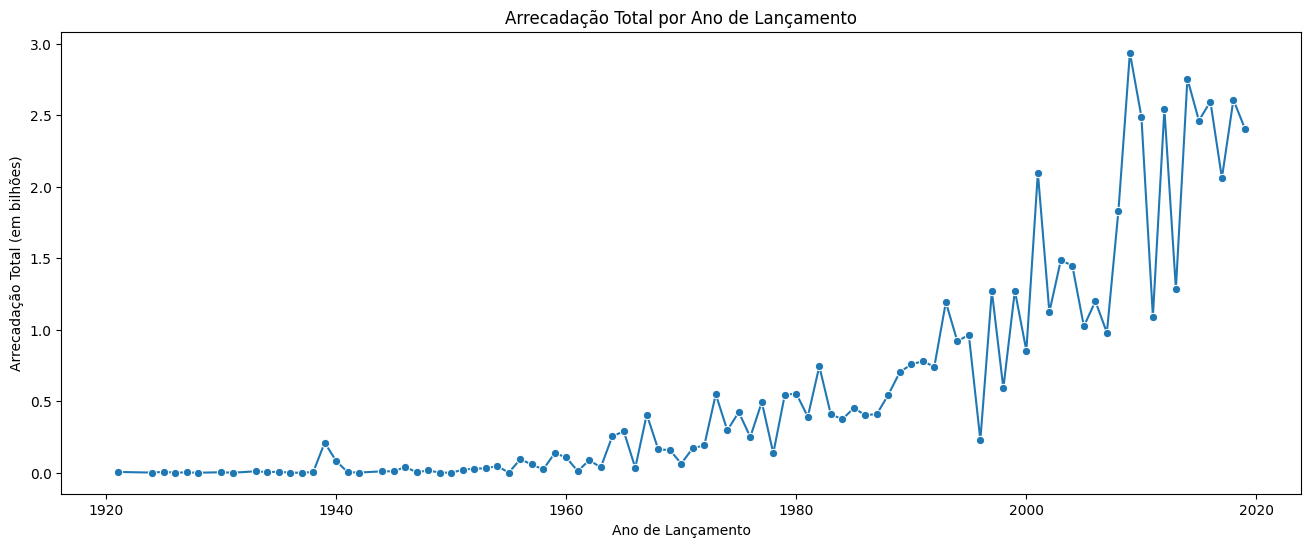

In [67]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(data=df_line_year_gross, x='Released_Year', y='Gross', marker='o')
ax.yaxis.offsetText.set_visible(False)
plt.title('Arrecadação Total por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Arrecadação Total (em bilhões)')
plt.show()


Vemos uma crescente arrecadação nos passar dos anos, com uma subida a partir 1960. Alem da quantidade de filmes/series feitos como tambem a quantidade de pessoas que assistem podemos ter o fator da inflação, sendo nescessario verificar se o dataset apresentado teve os valores corrigidos pela inflação.

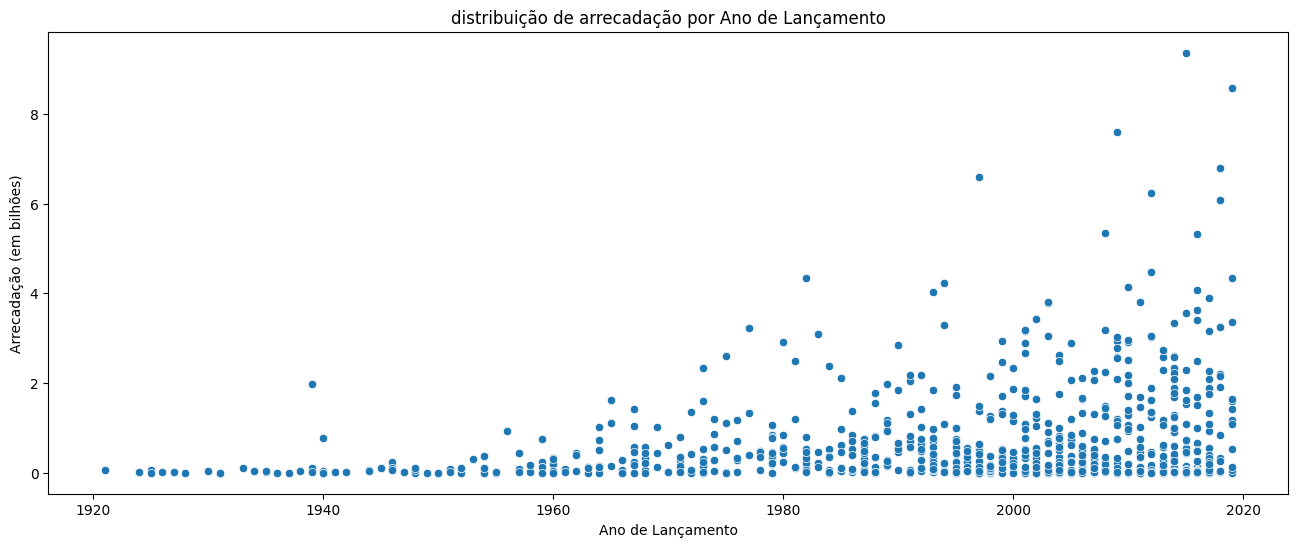

In [68]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(data=df_imdb_clean.dropna(subset=['Gross'])[['Gross','Released_Year']], x='Released_Year', y='Gross')
ax.yaxis.offsetText.set_visible(False)
plt.title('distribuição de arrecadação por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Arrecadação (em bilhões)')
plt.show()

### Por tempo de Duração

In [69]:
df_line_year_runtime = df_imdb_clean[['Released_Year','Runtime']].sort_values(by='Released_Year')

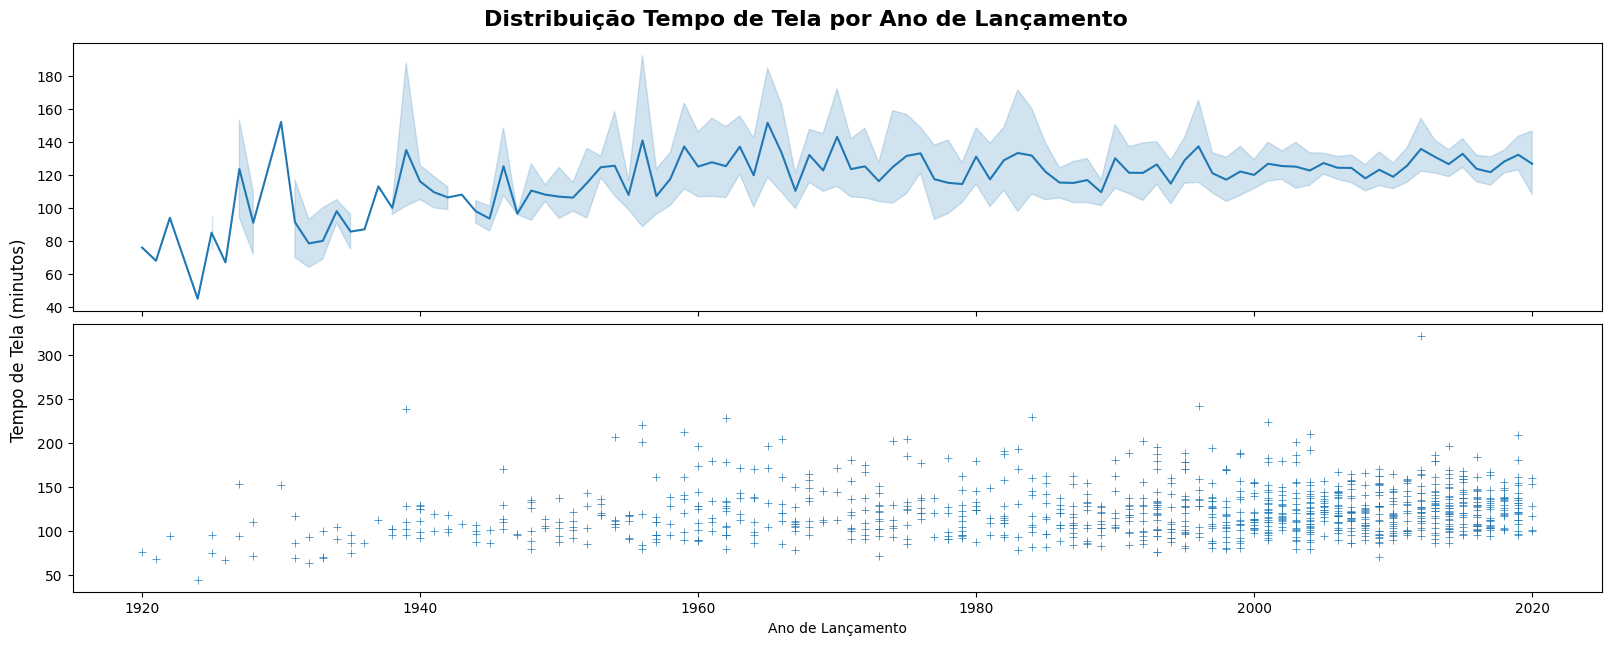

In [70]:
fig, axes = plt.subplots( 2, 1, figsize=(16, 6), sharex=True, constrained_layout=True)

fig.suptitle('Distribuição Tempo de Tela por Ano de Lançamento', fontsize=16, fontweight='bold', y=1.05)

sns.lineplot(data=df_line_year_runtime, x='Released_Year', y='Runtime', ax=axes[0])
axes[0].set_ylabel(None)

sns.scatterplot(data=df_line_year_runtime, x='Released_Year', y='Runtime', ax=axes[1], marker="+")
axes[1].set_ylabel(None)
plt.xlabel('Ano de Lançamento')

fig.supylabel("Tempo de Tela (minutos)")

plt.show()

Quando plotamos um *lineplot* caso ocorra de haver mais que uma observação para o mesmo “Ano”, o Seaborn calcula uma **média** (*mean*) para representar aquele ano automaticamente. Ele também calcula um intervalo de confiança de 95%, que dá uma noção de variabilidade (quanto os dados podem variar em torno da média).

No *scatterplot* conseguimos verificar a distribuição da quantidade de filmes, tendo as ultimas decadas se mantendo em sua grande maioria numa faixa entre 100 - 150 min de tela, com alguns *outliers*


## Faturamento

### Por Crítica

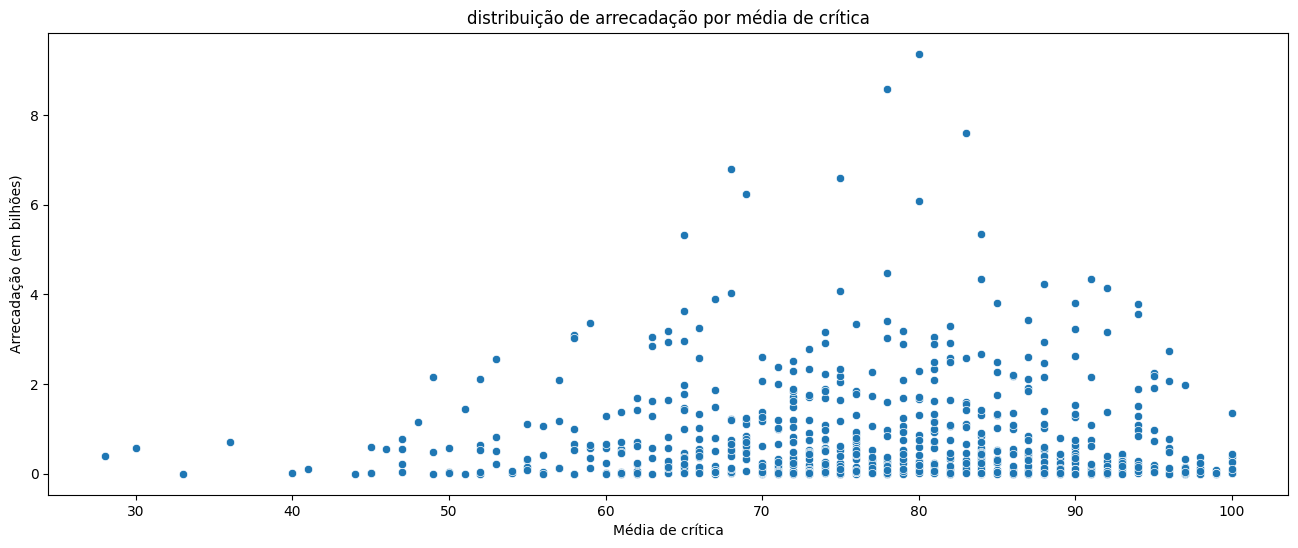

In [71]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(data=df_imdb_clean.dropna(subset=['Gross','Meta_score']), x='Meta_score', y='Gross')
ax.yaxis.offsetText.set_visible(False)
plt.title('distribuição de arrecadação por média de crítica')
plt.xlabel('Média de crítica')
plt.ylabel('Arrecadação (em bilhões)')
plt.show()

In [72]:
df_imdb_clean[['Gross','Meta_score']].corr()

,Gross,Meta_score
Gross,1.00000,-0.03048
Meta_score,-0.03048,1.00000


A principio não temos correlção forte entre faturamento e crítica.

## Nota IMDB

In [73]:
df_imdb_clean['IMDB_Rating'].describe()

count    998.000000
mean       7.947595
std        0.272198
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64

In [74]:
df_imdb_clean['IMDB_Rating'].value_counts().sort_index()

IMDB_Rating
7.6    123
7.7    157
7.8    151
7.9    106
8.0    141
8.1    127
8.2     67
8.3     43
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
Name: count, dtype: int64

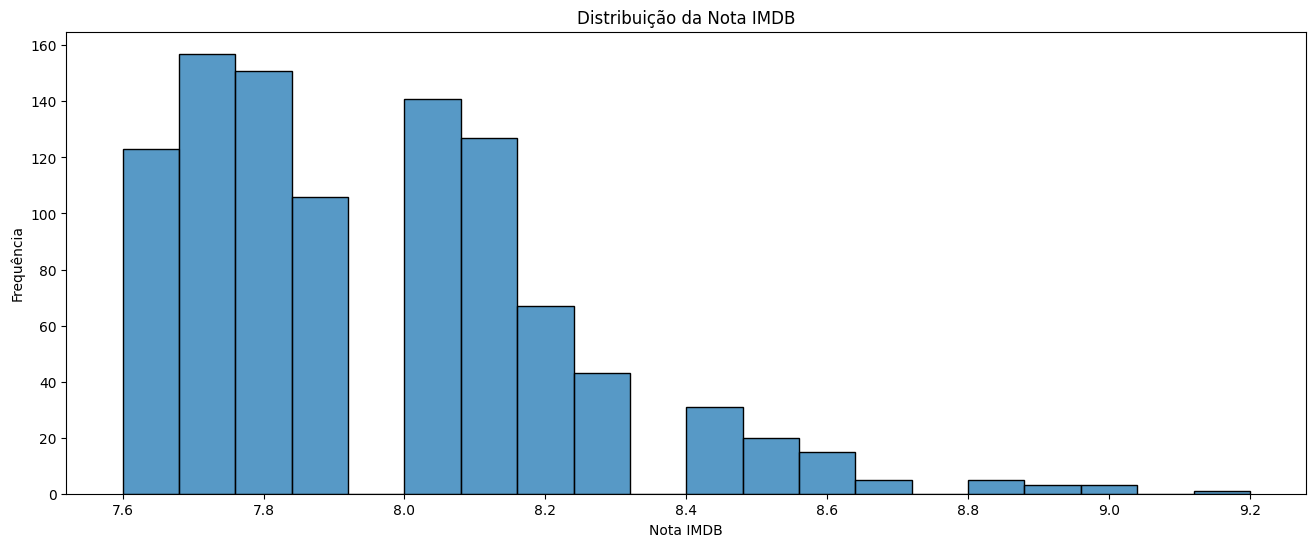

In [75]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(data=df_imdb_clean, x='IMDB_Rating')
plt.title('Distribuição da Nota IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Frequência')
plt.show()

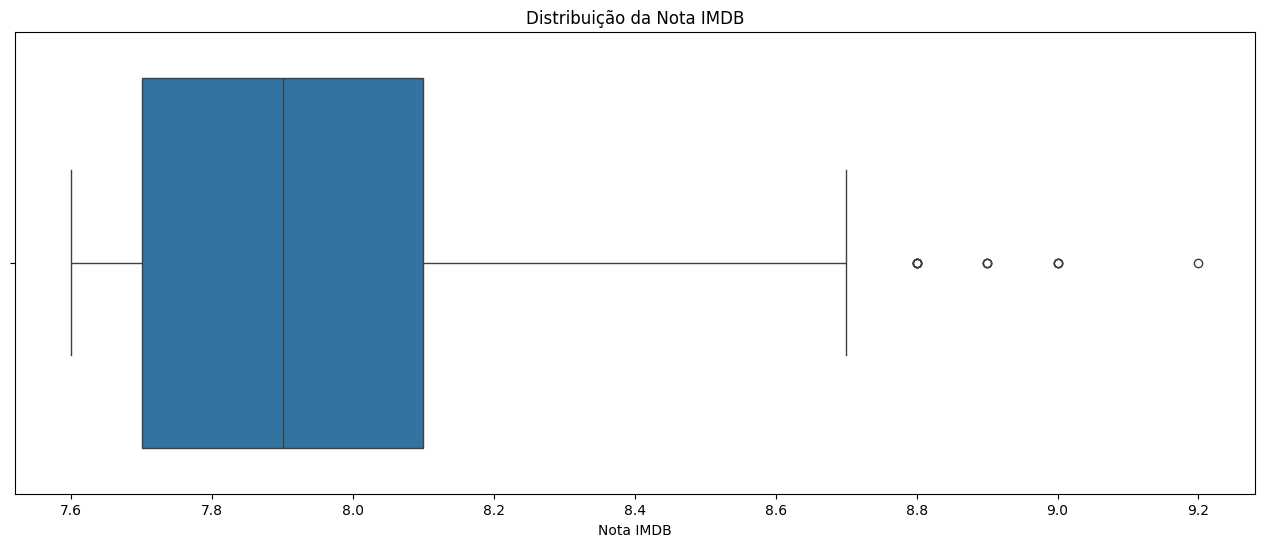

In [76]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df_imdb_clean, x='IMDB_Rating')
plt.title('Distribuição da Nota IMDB')
plt.xlabel('Nota IMDB')
plt.show()

Podemos observar no primeiro grafico *histplot* a frequencia de cada nota teve na base de dados, tendo sua maioria aproximadamente 7 - 8. A descontinuidade do grafico se da pela ausencia de alguns valores de nota como por exeemplo 9.1.

No *boxplot* conseguimos ver sua distribuição com seus *outliers* que 50% das notas se encontram abaixo de 7.9.

### Por Crítica

In [77]:
df_rating_score = df_imdb_clean[['IMDB_Rating', 'Meta_score']]

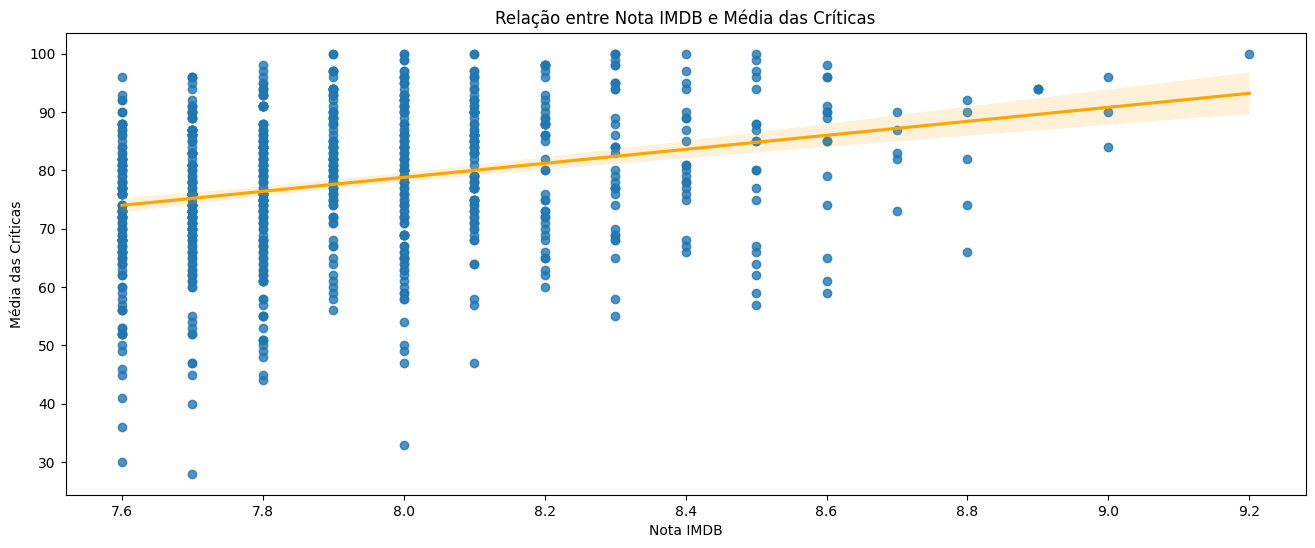

In [78]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.regplot(data=df_rating_score, x='IMDB_Rating', y='Meta_score', line_kws={'color': 'orange'})
plt.title('Relação entre Nota IMDB e Média das Críticas')
plt.xlabel('Nota IMDB')
plt.ylabel('Média das Críticas')
plt.show()

In [79]:
df_rating_score.corr()

,IMDB_Rating,Meta_score
IMDB_Rating,1.000000,0.271374
Meta_score,0.271374,1.000000


Tanto no grafico de *regplot* quanto na função *corr()* conseguimos observar uma pequena correlação entre o valor da nota do IMDB e a média ponderada de todas as criticas. Fica mais evidento com a linha desenhada no *regplot*, onde essa representa a correlação média com seu respectivo intervalo de confiança. 
Percebemos que quanto maior a nota no IMDB menor e a variação em relação a média das criticas, ou seja quanto maior a nota no IMDB maior e a nota das críticas, tendo elas variação para cima ou para baixo. 

Devido a poucos casos de notas altas no IMDB não fica claro se essa correlação e suficiente para a afirmação acima, seria nescessario uma quantidade de notas maiores para melhor analise.

### Por Numero de Votos

In [80]:
df_imdb_votes = df_imdb_clean[['IMDB_Rating', 'No_of_Votes']]

In [81]:
df_imdb_votes

,IMDB_Rating,No_of_Votes
0,9.2,1620367
1,9.0,2303232
2,9.0,1129952
3,9.0,689845
4,8.9,1642758
...,...,...
993,7.6,166544
994,7.6,34075
995,7.6,43374
996,7.6,26471


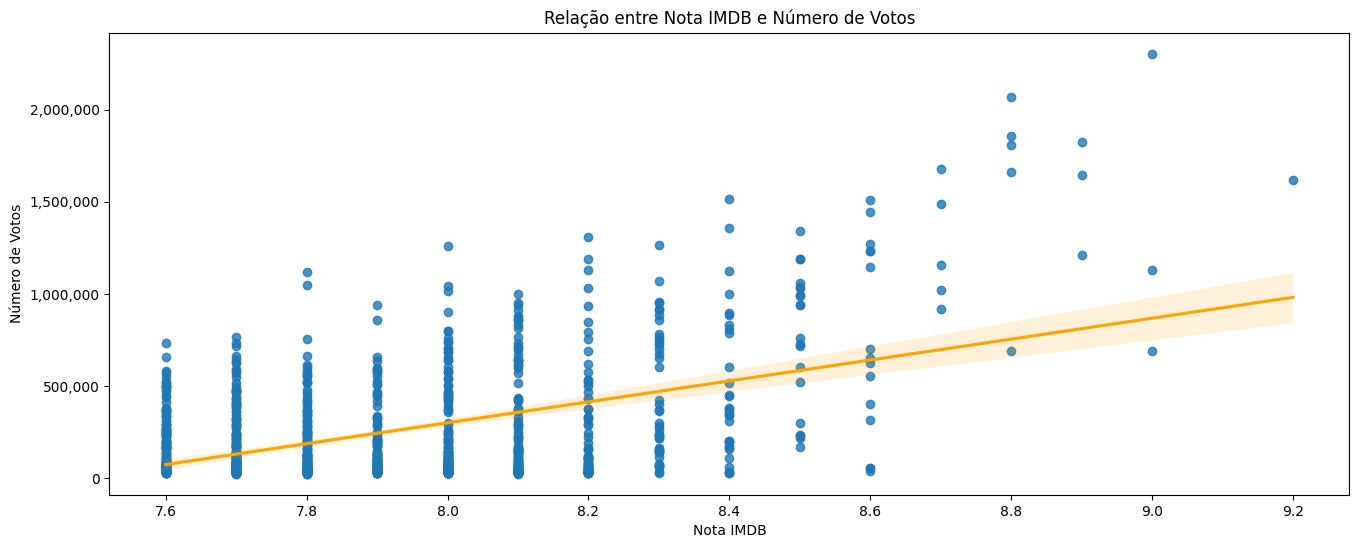

In [82]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.regplot(data=df_imdb_votes, x='IMDB_Rating', y='No_of_Votes', line_kws={'color': 'orange'})
plt.title('Relação entre Nota IMDB e Número de Votos')
plt.xlabel('Nota IMDB')
plt.ylabel('Número de Votos')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

Percebemos uma correlação positiva entre o valor da nota do IMDB e o número de votos (*aproximadamente 0.48*), essa correlação pode ser observada pela reta no grafico. Nota-se que quanto maior a pontuação no IMDB maiores são as chances de uma votação expressiva. Novamente, para realmente entendermos se essa preposição e verdadeira seria nescessario mais dados com notas altas do IMDB.

### Por Artista

Devido as colunas *Star_n* possuirem muitos valores e ser nescessario fazer uma transformação de categorico para numerico estudarei 2 formas para utilizar na transformação:

* 30 artistas que mais tiveram participação em filmes,
* 30 artistas com maiores média de *rating* no IMDB

#### Correlação

In [83]:
df_long_filt_artist = df_artist_melted[df_artist_melted["Artista"].isin(artist_freq)].copy()

In [84]:
df_long_filt_artist

,Star,Artista
1,Star1,Christian Bale
2,Star1,Al Pacino
7,Star1,Leonardo DiCaprio
8,Star1,Brad Pitt
10,Star1,Tom Hanks
...,...,...
598,Star4,Brad Pitt
728,Star4,Michael Caine
735,Star4,Scarlett Johansson
793,Star4,Matt Damon


In [85]:
enc_artist = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_colunas_artist = enc_artist.fit_transform(df_long_filt_artist[['Artista']])

In [86]:
OneHotEncoder_colunas_artist.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(265, 29))

In [87]:
OneHotEncoder_colunas_artist.toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
enc_artist.get_feature_names_out(['Artista']).tolist()

['Artista_Aamir Khan',
 'Artista_Al Pacino',
 'Artista_Brad Pitt',
 'Artista_Bruce Willis',
 'Artista_Cary Grant',
 'Artista_Christian Bale',
 'Artista_Clint Eastwood',
 'Artista_Denzel Washington',
 'Artista_Edward Norton',
 'Artista_Emma Watson',
 'Artista_Ethan Hawke',
 'Artista_Harrison Ford',
 'Artista_Humphrey Bogart',
 'Artista_Ian McKellen',
 'Artista_Jake Gyllenhaal',
 'Artista_James Stewart',
 'Artista_Jeff Bridges',
 'Artista_Johnny Depp',
 'Artista_Leonardo DiCaprio',
 'Artista_Mark Ruffalo',
 'Artista_Matt Damon',
 'Artista_Michael Caine',
 'Artista_Robert De Niro',
 'Artista_Robert Downey Jr.',
 'Artista_Russell Crowe',
 'Artista_Scarlett Johansson',
 'Artista_Tom Cruise',
 'Artista_Tom Hanks',
 'Artista_Toshirô Mifune']

In [89]:
one_hot_df = pd.DataFrame(OneHotEncoder_colunas_artist.toarray(), columns=enc_artist.get_feature_names_out(["Artista"]).tolist(), index=df_long_filt_artist.index)

In [90]:
one_hot_df.head(3)

,Artista_Aamir Khan,Artista_Al Pacino,Artista_Brad Pitt,Artista_Bruce Willis,Artista_Cary Grant,Artista_Christian Bale,Artista_Clint Eastwood,Artista_Denzel Washington,Artista_Edward Norton,Artista_Emma Watson,...,Artista_Mark Ruffalo,Artista_Matt Damon,Artista_Michael Caine,Artista_Robert De Niro,Artista_Robert Downey Jr.,Artista_Russell Crowe,Artista_Scarlett Johansson,Artista_Tom Cruise,Artista_Tom Hanks,Artista_Toshirô Mifune
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
one_hot_df = one_hot_df.groupby(one_hot_df.index).max()

In [92]:
one_hot_df.head(5)

,Artista_Aamir Khan,Artista_Al Pacino,Artista_Brad Pitt,Artista_Bruce Willis,Artista_Cary Grant,Artista_Christian Bale,Artista_Clint Eastwood,Artista_Denzel Washington,Artista_Edward Norton,Artista_Emma Watson,...,Artista_Mark Ruffalo,Artista_Matt Damon,Artista_Michael Caine,Artista_Robert De Niro,Artista_Robert Downey Jr.,Artista_Russell Crowe,Artista_Scarlett Johansson,Artista_Tom Cruise,Artista_Tom Hanks,Artista_Toshirô Mifune
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df_imdb_clean_v1 = pd.concat([df_imdb_clean, one_hot_df], axis=1)

In [94]:
df_imdb_clean_v1.shape

(998, 58)

In [95]:
df_imdb_clean_v1.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Artista_Mark Ruffalo,Artista_Matt Damon,Artista_Michael Caine,Artista_Robert De Niro,Artista_Robert Downey Jr.,Artista_Russell Crowe,Artista_Scarlett Johansson,Artista_Tom Cruise,Artista_Tom Hanks,Artista_Toshirô Mifune
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


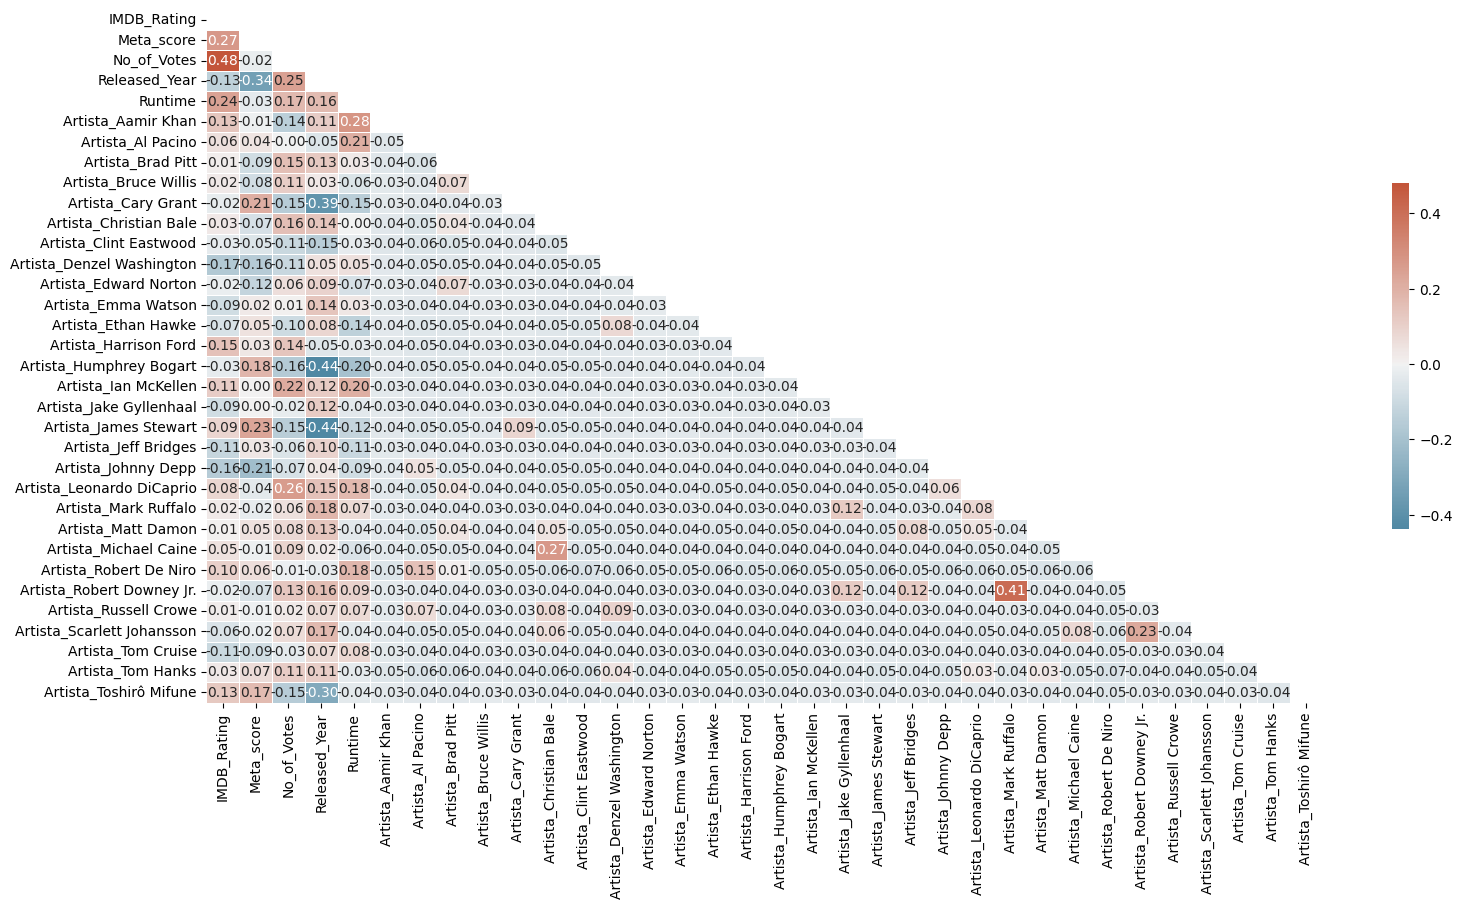

In [96]:
# matriz de correlação entre as variáveis numéricas
corr = df_imdb_clean_v1[['IMDB_Rating','Meta_score','No_of_Votes', 'Released_Year','Runtime',
              'Artista_Aamir Khan','Artista_Al Pacino','Artista_Brad Pitt', 'Artista_Bruce Willis', 'Artista_Cary Grant',
              'Artista_Christian Bale', 'Artista_Clint Eastwood', 'Artista_Denzel Washington','Artista_Edward Norton',
              'Artista_Emma Watson', 'Artista_Ethan Hawke', 'Artista_Harrison Ford','Artista_Humphrey Bogart', 'Artista_Ian McKellen',
              'Artista_Jake Gyllenhaal', 'Artista_James Stewart','Artista_Jeff Bridges', 'Artista_Johnny Depp',
              'Artista_Leonardo DiCaprio', 'Artista_Mark Ruffalo','Artista_Matt Damon', 'Artista_Michael Caine', 'Artista_Robert De Niro',
              'Artista_Robert Downey Jr.', 'Artista_Russell Crowe','Artista_Scarlett Johansson', 'Artista_Tom Cruise', 'Artista_Tom Hanks',
              'Artista_Toshirô Mifune']].corr()
f, ax = plt.subplots(figsize=(18, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.show()

Para a matriz de correlação acima conseguimos verificar que os principais artistas (que mais participaram de filmes/series) da base de dados não tiveram muito peso relacionado a nota da IMDB para os filmes. Alguns outros *insights*:

* Os artistas **James Stewart**, **Humphrey Bogart**, **Cary Grant** e **Toshirô Mifune** tiveram correlação negativa forte com a coluna *'Released_Year'*. Isso se deve ao fato de os atores atuaram pricipalmente em filmes das decadas iniciais: 

In [97]:
filtro = df_imdb_clean_v1[['Star1','Star2','Star3','Star4']].isin(['James Stewart', 'Humphrey Bogart', 'Cary Grant', 'Toshirô Mifune']).any(axis=1)
np.sort(df_imdb_clean_v1[filtro]['Released_Year'].unique())

array([1938, 1939, 1940, 1941, 1942, 1944, 1946, 1948, 1950, 1951, 1954,
       1957, 1958, 1959, 1961, 1962, 1963])

* Tambem temos uma correlação positiva forte para os atores **Robert Downey Jr.** e **Mark Ruffalo**. Isso se deve ao atores trabalharem principalmente em blockbusters de super-herois, muitas vezes em conjunto por causa dos personagens:

In [98]:
filtro = df_imdb_clean_v1[['Star1','Star2','Star3','Star4']].isin(['Robert Downey Jr.', 'Mark Ruffalo']).any(axis=1)
df_imdb_clean_v1[filtro]['Series_Title']

58              Avengers: Endgame
59         Avengers: Infinity War
143                Shutter Island
216                     Spotlight
355                  The Avengers
471                Thor: Ragnarok
500                      Iron Man
581    Captain America: Civil War
765                        Zodiac
875                   Dark Waters
912               Sherlock Holmes
Name: Series_Title, dtype: object

In [99]:
filtro_final = df_imdb_clean_v1[['Star1','Star2','Star3','Star4']].apply(lambda row: {'Robert Downey Jr.', 'Mark Ruffalo'}.issubset(set(row)), axis=1)
df_imdb_clean_v1[filtro_final]['Series_Title']

58          Avengers: Endgame
59     Avengers: Infinity War
765                    Zodiac
Name: Series_Title, dtype: object

* O mesmo caso pode ser visto com os atores **Christian Bale** e **Michael Caine**

In [100]:
filtro = df_imdb_clean_v1[['Star1','Star2','Star3','Star4']].isin(['Christian Bale', 'Michael Caine']).any(axis=1)
df_imdb_clean_v1[filtro]['Series_Title']

1                   The Dark Knight
35                     The Prestige
62            The Dark Knight Rises
153                   Batman Begins
215                  Ford v Ferrari
418                          Sleuth
511                 Children of Men
526          Hannah and Her Sisters
598                   The Big Short
612                     The Fighter
690       The Man Who Would Be King
728    Kingsman: The Secret Service
772                    3:10 to Yuma
776                   The Machinist
817      The Muppet Christmas Carol
830               Empire of the Sun
951                 American Psycho
Name: Series_Title, dtype: object

In [101]:
filtro_final = df_imdb_clean_v1[['Star1','Star2','Star3','Star4']].apply(lambda row: {'Christian Bale', 'Michael Caine'}.issubset(set(row)), axis=1)
df_imdb_clean_v1[filtro_final]['Series_Title']

1      The Dark Knight
35        The Prestige
153      Batman Begins
Name: Series_Title, dtype: object

Agora compararemos com os top 30 artistas com maiores medias no IMDB

In [102]:
df_artist_melted

,Star,Artista
0,Star1,Marlon Brando
1,Star1,Christian Bale
2,Star1,Al Pacino
3,Star1,Henry Fonda
4,Star1,Elijah Wood
...,...,...
993,Star4,Buddy Ebsen
994,Star4,Carroll Baker
995,Star4,Donna Reed
996,Star4,William Bendix


In [103]:
# df_long_filt_artist = df_artist_melted[df_artist_melted["Artista"].isin(artist_freq)].copy()
df_imdb_clean.melt(id_vars='IMDB_Rating',value_vars=["Star1", "Star2", "Star3", "Star4"], var_name="Star", value_name="Artista")

,IMDB_Rating,Star,Artista
0,9.2,Star1,Marlon Brando
1,9.0,Star1,Christian Bale
2,9.0,Star1,Al Pacino
3,9.0,Star1,Henry Fonda
4,8.9,Star1,Elijah Wood
...,...,...,...
3987,7.6,Star4,Buddy Ebsen
3988,7.6,Star4,Carroll Baker
3989,7.6,Star4,Donna Reed
3990,7.6,Star4,William Bendix


In [104]:
df_artist_melted_median = df_imdb_clean.melt(id_vars='IMDB_Rating',value_vars=["Star1", "Star2", "Star3", "Star4"], var_name="Star", value_name="Artista")

In [105]:
df_artist_melted_median[['IMDB_Rating','Artista']].groupby('Artista').mean().sort_values(by='IMDB_Rating', ascending=False)

,IMDB_Rating
Artista,
Aaron Eckhart,9.0
Caroline Goodall,8.9
John Travolta,8.9
Sean Bean,8.8
Sally Field,8.8
...,...
Daniel Stern,7.6
Daniel Giménez Cacho,7.6
George Harrison,7.6


In [106]:
df_artist_melted_median[df_artist_melted_median['Artista'] == 'Elijah Wood']

,IMDB_Rating,Star,Artista
4,8.9,Star1,Elijah Wood
9,8.8,Star1,Elijah Wood
12,8.7,Star1,Elijah Wood


In [107]:
df_top30_artist = df_artist_melted_median[['IMDB_Rating','Artista']].groupby('Artista').mean().sort_values(by='IMDB_Rating', ascending=False).index[:30]

In [108]:
df_top30_artist

Index(['Aaron Eckhart', 'Caroline Goodall', 'John Travolta', 'Sean Bean',
       'Sally Field', 'Elliot Page', 'Meat Loaf', 'Aldo Giuffrè',
       'Zach Grenier', 'Elijah Wood', 'Lilly Wachowski', 'Ray Liotta',
       'Lorraine Bracco', 'Michael Berryman', 'Peter Brocco', 'Keanu Reeves',
       'Louise Fletcher', 'Edward Burns', 'Yukiko Shimazaki', 'Akira Ishihama',
       'Rumi Hiiragi', 'Aparna Balamurali', 'Phillipa Soo',
       'Renée Elise Goldsberry', 'Andrew Kevin Walker', 'Daveigh Chase',
       'Cho Yeo-jeong', 'Keiko Tsushima', 'Bonnie Hunt', 'Leandro Firmino'],
      dtype='object', name='Artista')

In [109]:
df_top30_artist.shape[0]

30

In [110]:
df_long_filt_artist_v2 = df_artist_melted[df_artist_melted["Artista"].isin(df_top30_artist)].copy()

In [111]:
df_long_filt_artist_v2.shape

(32, 2)

In [112]:
enc_artist_v2 = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_colunas_artist_v2 = enc_artist_v2.fit_transform(df_long_filt_artist_v2[['Artista']])

In [113]:
OneHotEncoder_colunas_artist_v2.toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [114]:
OneHotEncoder_colunas_artist_v2.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
enc_artist_v2.get_feature_names_out(['Artista']).tolist()

['Artista_Aaron Eckhart',
 'Artista_Akira Ishihama',
 'Artista_Aldo Giuffrè',
 'Artista_Andrew Kevin Walker',
 'Artista_Aparna Balamurali',
 'Artista_Bonnie Hunt',
 'Artista_Caroline Goodall',
 'Artista_Cho Yeo-jeong',
 'Artista_Daveigh Chase',
 'Artista_Edward Burns',
 'Artista_Elijah Wood',
 'Artista_Elliot Page',
 'Artista_John Travolta',
 'Artista_Keanu Reeves',
 'Artista_Keiko Tsushima',
 'Artista_Leandro Firmino',
 'Artista_Lilly Wachowski',
 'Artista_Lorraine Bracco',
 'Artista_Louise Fletcher',
 'Artista_Meat Loaf',
 'Artista_Michael Berryman',
 'Artista_Peter Brocco',
 'Artista_Phillipa Soo',
 'Artista_Ray Liotta',
 'Artista_Renée Elise Goldsberry',
 'Artista_Rumi Hiiragi',
 'Artista_Sally Field',
 'Artista_Sean Bean',
 'Artista_Yukiko Shimazaki',
 'Artista_Zach Grenier']

In [116]:
one_hot_df_v2 = pd.DataFrame(OneHotEncoder_colunas_artist_v2.toarray(), columns=enc_artist_v2.get_feature_names_out(["Artista"]).tolist(), index=df_long_filt_artist_v2.index)
one_hot_df_v2.head(3)

,Artista_Aaron Eckhart,Artista_Akira Ishihama,Artista_Aldo Giuffrè,Artista_Andrew Kevin Walker,Artista_Aparna Balamurali,Artista_Bonnie Hunt,Artista_Caroline Goodall,Artista_Cho Yeo-jeong,Artista_Daveigh Chase,Artista_Edward Burns,...,Artista_Michael Berryman,Artista_Peter Brocco,Artista_Phillipa Soo,Artista_Ray Liotta,Artista_Renée Elise Goldsberry,Artista_Rumi Hiiragi,Artista_Sally Field,Artista_Sean Bean,Artista_Yukiko Shimazaki,Artista_Zach Grenier
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
one_hot_df_v2 = one_hot_df_v2.groupby(one_hot_df_v2.index).max()
one_hot_df_v2.head(3)

,Artista_Aaron Eckhart,Artista_Akira Ishihama,Artista_Aldo Giuffrè,Artista_Andrew Kevin Walker,Artista_Aparna Balamurali,Artista_Bonnie Hunt,Artista_Caroline Goodall,Artista_Cho Yeo-jeong,Artista_Daveigh Chase,Artista_Edward Burns,...,Artista_Michael Berryman,Artista_Peter Brocco,Artista_Phillipa Soo,Artista_Ray Liotta,Artista_Renée Elise Goldsberry,Artista_Rumi Hiiragi,Artista_Sally Field,Artista_Sean Bean,Artista_Yukiko Shimazaki,Artista_Zach Grenier
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
df_imdb_clean_v2 = pd.concat([df_imdb_clean, one_hot_df_v2], axis=1)

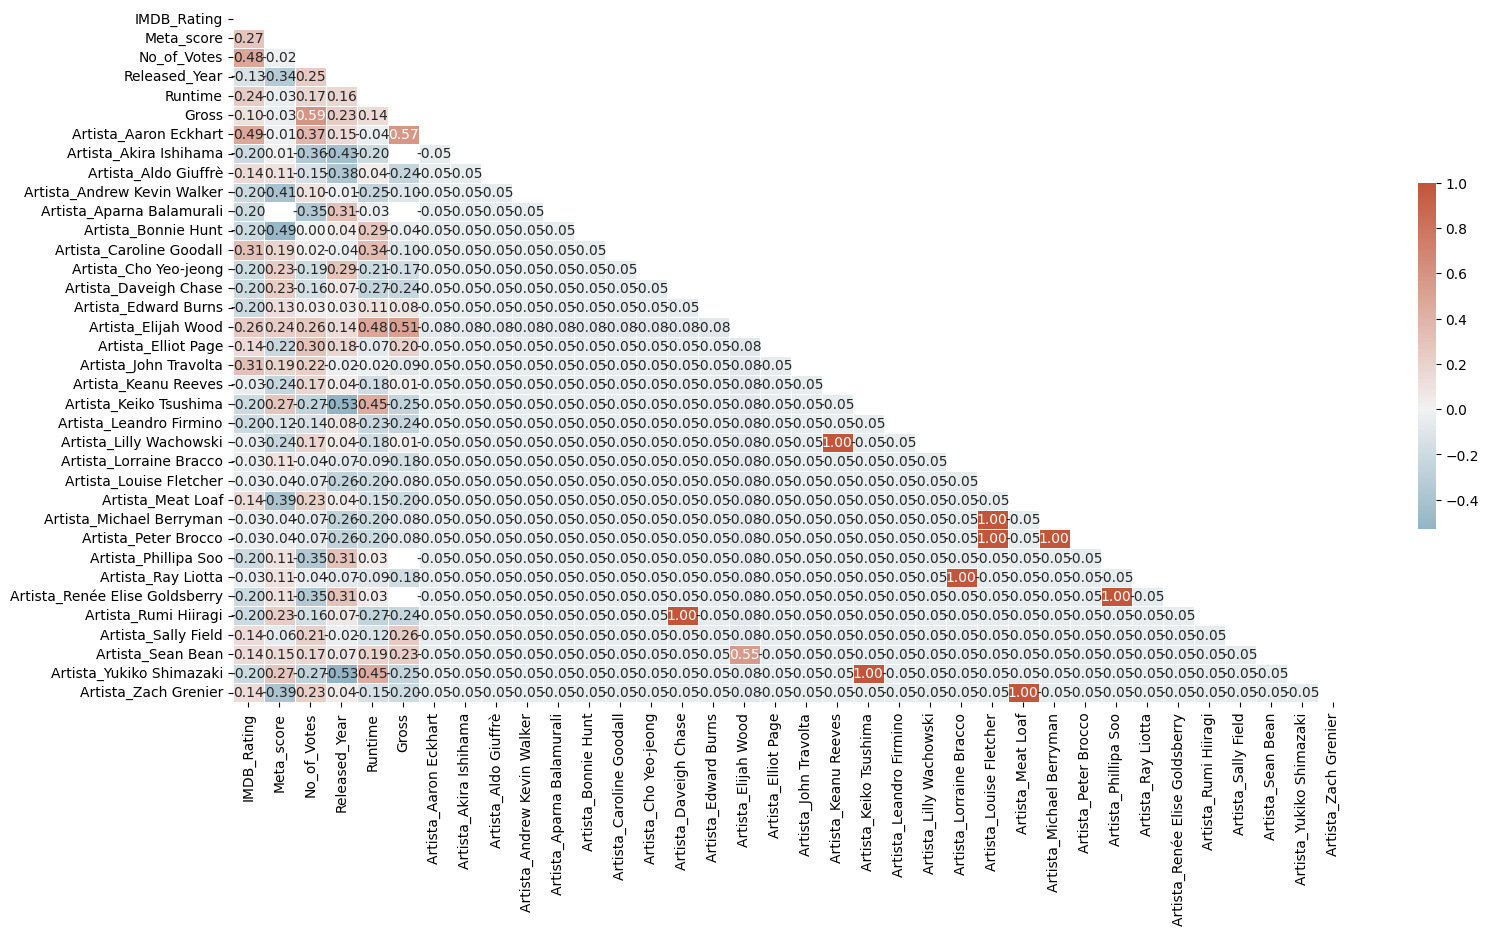

In [119]:
# matriz de correlação entre as variáveis numéricas
corr = df_imdb_clean_v2[['IMDB_Rating','Meta_score','No_of_Votes', 'Released_Year','Runtime', 'Gross',
    'Artista_Aaron Eckhart','Artista_Akira Ishihama','Artista_Aldo Giuffrè','Artista_Andrew Kevin Walker',
    'Artista_Aparna Balamurali','Artista_Bonnie Hunt','Artista_Caroline Goodall','Artista_Cho Yeo-jeong',
    'Artista_Daveigh Chase','Artista_Edward Burns','Artista_Elijah Wood','Artista_Elliot Page',
    'Artista_John Travolta','Artista_Keanu Reeves','Artista_Keiko Tsushima','Artista_Leandro Firmino',
    'Artista_Lilly Wachowski','Artista_Lorraine Bracco','Artista_Louise Fletcher','Artista_Meat Loaf',
    'Artista_Michael Berryman','Artista_Peter Brocco','Artista_Phillipa Soo','Artista_Ray Liotta',
    'Artista_Renée Elise Goldsberry','Artista_Rumi Hiiragi','Artista_Sally Field',
    'Artista_Sean Bean','Artista_Yukiko Shimazaki','Artista_Zach Grenier']].corr()
f, ax = plt.subplots(figsize=(18, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.show()

Conseguimos constatar algumas correlações de valor maximo, pegando por exemplo a relação de **Keanu Reeves** e **Lilly Wachowski**, nela conseguimos ver apenas uma entrada para o filme *The Matrix*, consequentemente sempre que ah um havera o outro no mesmo filme. Assim é a mesma regra para os outros casos onde esse valor aparece.

In [120]:
df_artist_melted[df_artist_melted['Artista'] == 'Keanu Reeves']

,Star,Artista
13,Star2,Keanu Reeves


In [121]:
df_artist_melted[df_artist_melted['Artista'] == 'Lilly Wachowski']

,Star,Artista
13,Star1,Lilly Wachowski


In [122]:
df_imdb_clean.iloc[13]

Series_Title                                                   The Matrix
Released_Year                                                        1999
Certificate                                                             A
Runtime                                                               136
Genre                                                      Action, Sci-Fi
IMDB_Rating                                                           8.7
Overview                When a beautiful stranger leads computer hacke...
Meta_score                                                           73.0
Director                                                   Lana Wachowski
Star1                                                     Lilly Wachowski
Star2                                                        Keanu Reeves
Star3                                                  Laurence Fishburne
Star4                                                    Carrie-Anne Moss
No_of_Votes                           

### Por Classificação

In [123]:
df_certification_imdb = df_imdb_clean[['Certificate','IMDB_Rating']].dropna(subset=['Certificate'])

In [124]:
df_certification_imdb.isna().sum()

Certificate    0
IMDB_Rating    0
dtype: int64

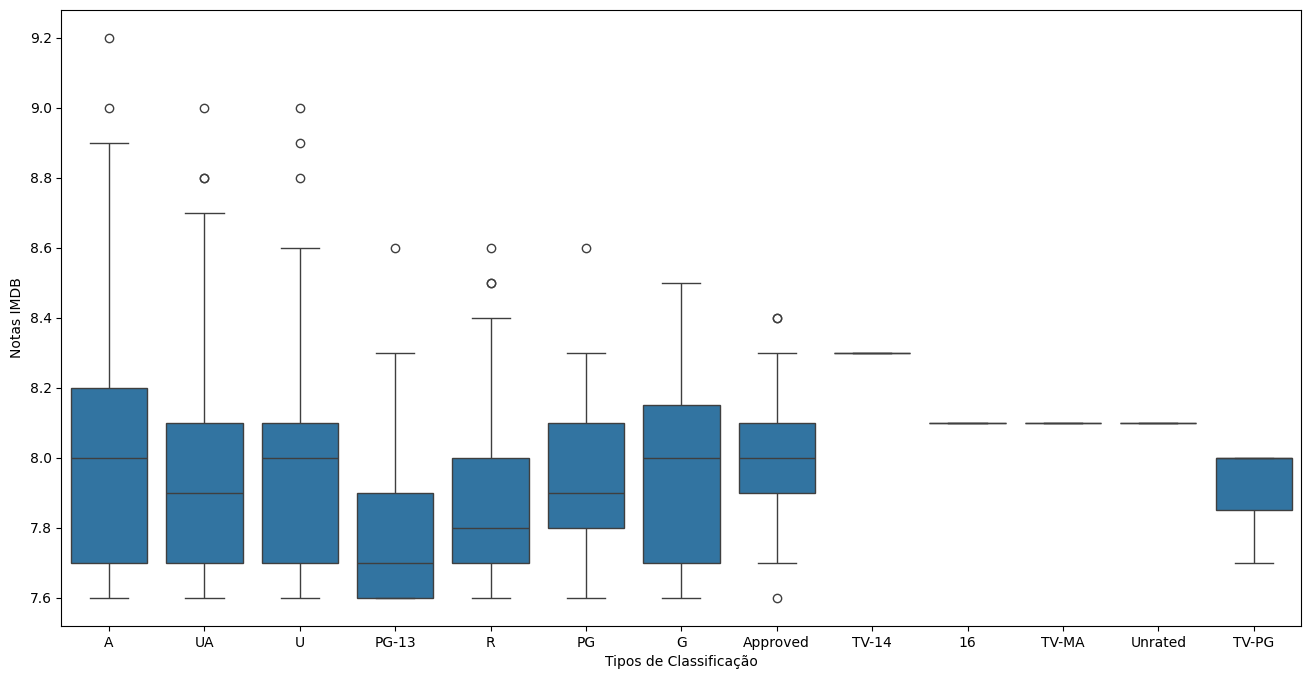

In [125]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df_certification_imdb, y='IMDB_Rating', x='Certificate')
plt.xlabel('Tipos de Classificação')
plt.ylabel('Notas IMDB')
plt.show()

Plotando as variaveis com o *boxplot* conseguimos verificar sua distrubição para cada tipo de classificação. Ao primeiro momento conseguimos observar alguns *outliers* nos grupos mais a esquerda do gráfico, tambem percebemos uma grande variação nos valores para esses grupos comparados com os mais a direita do gráfico.

A Classificação **A** teve maior variação de notas, com as maiores notas para esse grupo seguindo por **UA** e **U**. Os boxplots dos tipos **TV-14**, **16**, **TV-MA** e **Unrated** tiveram poucas observações no dataset, por isso seu achatamento.

Abaixo podemos ver a distribuição de nota da IMDB por filmes que não tinham classificação.

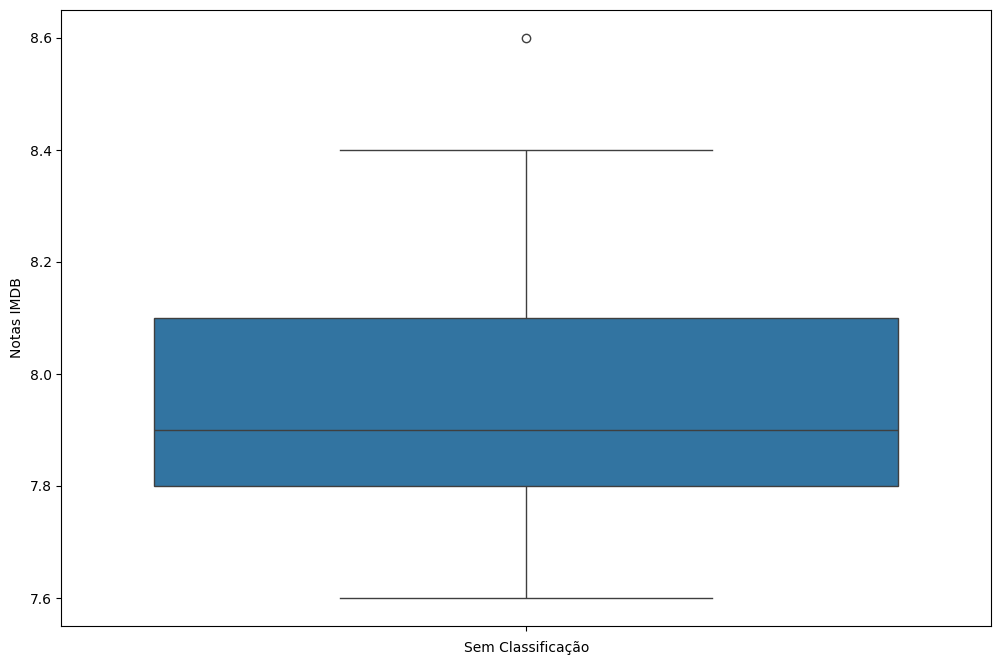

In [126]:
df_certification_imdb = df_imdb_clean[df_imdb_clean['Certificate'].isna()]

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_certification_imdb, y='IMDB_Rating')
plt.xlabel('Sem Classificação')
plt.ylabel('Notas IMDB')
plt.show()

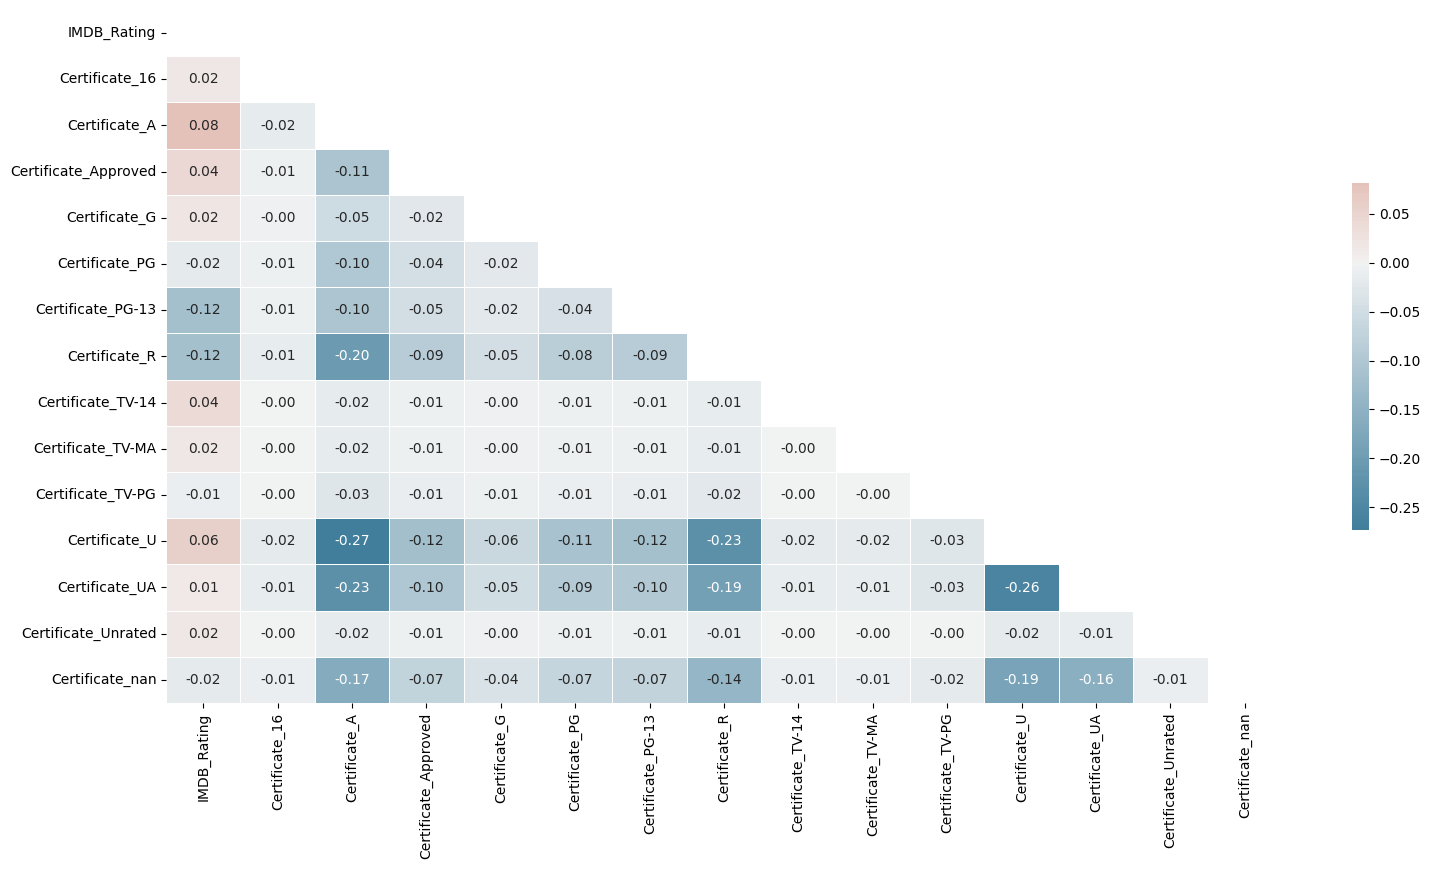

In [127]:
# matriz de correlação entre as variáveis numéricas
corr = df_imdb_clean[['IMDB_Rating','Certificate_16','Certificate_A','Certificate_Approved','Certificate_G',
    'Certificate_PG','Certificate_PG-13','Certificate_R','Certificate_TV-14','Certificate_TV-MA',
    'Certificate_TV-PG','Certificate_U','Certificate_UA','Certificate_Unrated','Certificate_nan']].corr()
f, ax = plt.subplots(figsize=(18, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.show()

Não conseguimos observar uma correlação expressiva das classificações com relação a variavel *'IMDB_Rating'*.

### Por faturamento

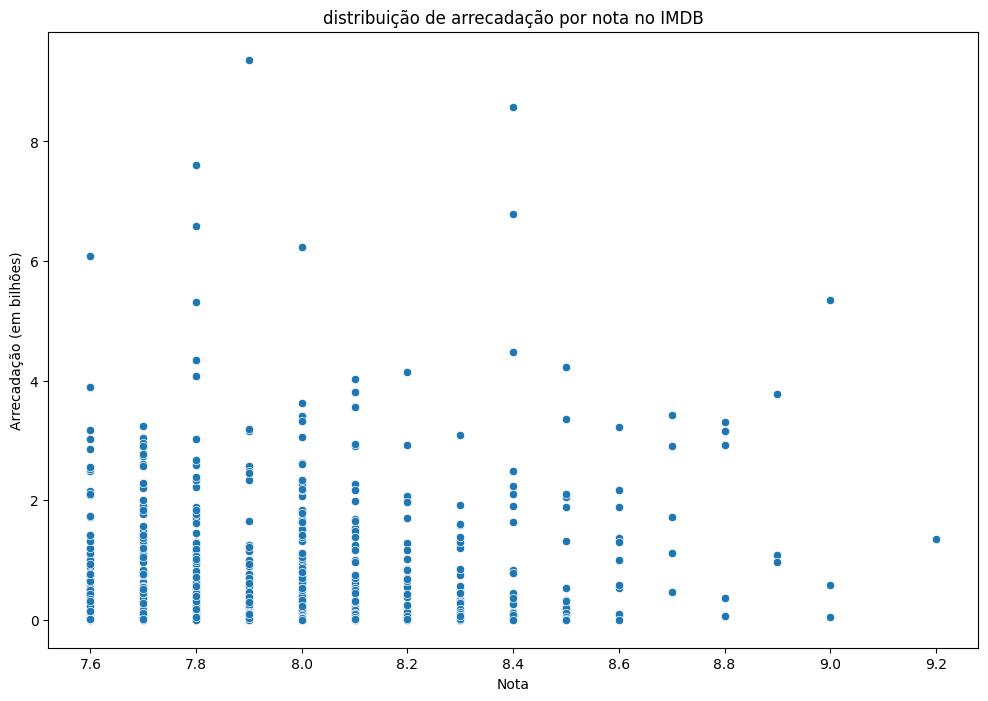

In [128]:
df_imdb_rating_gross = df_imdb_clean[['Gross','IMDB_Rating']].dropna(subset=['Gross'])

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_imdb_rating_gross, x='IMDB_Rating', y='Gross')
ax.yaxis.offsetText.set_visible(False)
plt.title('distribuição de arrecadação por nota no IMDB')
plt.xlabel('Nota')
plt.ylabel('Arrecadação (em bilhões)')
plt.show()

In [129]:
df_imdb_clean[['Gross','IMDB_Rating']].corr()

,Gross,IMDB_Rating
Gross,1.000000,0.099393
IMDB_Rating,0.099393,1.000000


Não existe uma correlação forte entre faturamento e nota do IMDB

# Previsão IMDB

Para fase de treinamento do modelo iremos seguir com algumas iniciativas:

* Iremos Remover os valores ausentes de *Gross*, *Meta_score* e *Certificates* nulos, como não encontrei alguma maneira de  subistituir seus valores sua falta pode acabar interferindo no processo de treinamento.

* No momento não trabalharei com as colunas 'Director' e 'Star1','Star2'..., pensei em utilizar inicialmente a função *OneHotEncoder* mas ficaria com muitas colunas, não sei se seria ideal para uma primeira bateria de testes.

* Resumidamente Removi todas as colunas exceto `Meta_score`,`No_of_Votes` e `Gross` por não apresentarem uma correlação significativa com *IMDB_Rating*

No caso estamos tratando de solucionar um problema de regressão, estarei utilizando o *XGBooster*

Para parametro/medida de performace estarei usando o *RMSE - (Root-mean-square deviation)*. Sua interpratação, valor gerado é da mesma unidade do valor alvo, facilitando sua compreensão. tambem penaliza grandes erros assim minimizando valores muito distantes que estejam errados. 

## Separação entre dados de treino e teste

In [130]:
df_imdb_clean.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_UA,Certificate_Unrated,Certificate_nan
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
df_imdb_clean.shape

(998, 29)

In [132]:
df_final = df_imdb_clean.loc[df_imdb_clean["Certificate_nan"] != 1.0].copy()


In [133]:
df_final.dropna(inplace=True)

In [134]:
df_final.shape

(713, 29)

In [135]:
from sklearn.model_selection import train_test_split

y = df_final['IMDB_Rating']
X = df_final.drop(columns=['IMDB_Rating','Series_Title', 'Released_Year', 'Certificate','Runtime','Genre','Overview','Director', 'Star1', 'Star2','Star3', 'Star4', 
                           'Certificate_16','Certificate_A','Certificate_Approved','Certificate_G',
    'Certificate_PG','Certificate_PG-13','Certificate_R','Certificate_TV-14','Certificate_TV-MA',
    'Certificate_TV-PG','Certificate_U','Certificate_UA','Certificate_Unrated','Certificate_nan'], axis=1)


In [136]:
# 80% treino e 20% restante sera dividido entre validação e teste
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.8, random_state=0)

In [137]:
print(X_train.shape)
print(X_test.shape)

(570, 3)
(143, 3)


## GridSearch para melhores parametros

In [138]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

parameters = {
    'learning_rate': [0.001, 0.05, 0.01, 0.1, 0.3],
    'n_estimators': [10,20,50,100,200],
    'max_depth': [2,3,5],
    'gamma': [0.0, 0.001, 0.1, 0.2],
    'random_state': [0],
    'booster': ['gbtree', 'gblinear', 'dart']
}

gs_cv = GridSearchCV(estimator=XGBRegressor(),
                     param_grid=parameters,
                     n_jobs=-1,
                     scoring='neg_root_mean_squared_error').fit(X_train, y_train)

print("Melhor: {} usando {}".format(gs_cv.best_score_, gs_cv.best_params_))


Melhor: -0.19590720191402017 usando {'booster': 'gbtree', 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20, 'random_state': 0}


## XGBooster

In [139]:
xgboost = XGBRegressor(booster='gbtree', gamma=0.001, learning_rate=0.1, max_depth=3, n_estimators=50, random_state=0)

In [140]:
xgboost.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [141]:
resultados = xgboost.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
rmse = np.sqrt(mean_squared_error(y_test, resultados))
r2 = r2_score(y_test, resultados)

In [144]:
print(f"RMSE: {rmse:.2f}")

RMSE: 0.19


##  Entregas

### Qual filme você recomendaria para uma pessoa que você não conhece?

In [145]:
df_filme_recomendação = df_imdb_clean.dropna()

In [146]:
df_filme_recomendação = df_filme_recomendação[df_filme_recomendação[['Certificate_UA','Certificate_PG','Certificate_PG-13','Certificate_Approved']]
                                             .isin([1.0]).any(axis=1)].sort_values(by=['IMDB_Rating','Meta_score','No_of_Votes','Released_Year'], ascending=False)

In [147]:
df_filme_recomendação.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_UA,Certificate_Unrated,Certificate_nan
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,Forrest Gump,1994,UA,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Eu escolheria ***The Dark Knight*** como recomendação. Escolhi seguindo como criterio a maior nota no IMDB, seguido pela média da critica, número de votos e com lancamento mais recente. Tambem selecionei conteudo que não seja para maiores de idade mas que tenham uma classificação diferente de livre para possuir temas mais abbrangentes.

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

Segundo algumas analises ate o momento com o dataset em questão conseguimos obter fatores de relacionamento com a expectativa de faturamento:

* `No_of_Votes` possui relação com o faturamento segundo alguns heatmaps que construimos anteriormente muito positiva. Nesse caso filmes com mais média de votos tendem a ter maior faturamento.

* `Released_Year` possui leve relação com faturameno, com os graficos construidos durante esse notebook verificamos que quanto mais novo e o filme maiores as chances de ele possuir um arecadação forte, entretanto precisamo notar, como anteriormente, que existe varios fatores para isso como aumento de telespectadores a apartir do barateamento para assistir filmes/series, inflação entre outros...

* **Classificação**, **elenco** e **diretores** tambem podem participar de uma alta expectativa de faturamento, entretanto não foi observado um correlação forte entre esses atributos.

### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [148]:
df_imdb_clean["Genre"].str.split(",").explode().str.strip().value_counts()

Genre
Drama        722
Comedy       233
Crime        208
Adventure    196
Action       189
Thriller     136
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

def scikitTokenizer(df_genre):
        vectorizer = CountVectorizer(stop_words='english')
        X = vectorizer.fit_transform(df_genre['Overview'])
        tokens = vectorizer.get_feature_names_out()
        frequencias = X.toarray().sum(axis=0)
        return pd.DataFrame({"Token": tokens,"Frequência": frequencias}).sort_values(by="Frequência", ascending=False).reset_index(drop=True)

In [150]:
df_crime = df_imdb_clean[df_imdb_clean['Genre'].str.contains('Crime')]

In [151]:
df_freq = scikitTokenizer(df_crime)

In [152]:
df_freq.head(5)

,Token,Frequência
0,young,25
1,man,23
2,murder,21
3,crime,19
4,police,19


In [153]:
colunas_de_genero = ['Family','Action','War']

for genero in colunas_de_genero:
    df_genero = df_imdb_clean[df_imdb_clean['Genre'].str.contains(genero)]
    df_freq = scikitTokenizer(df_genero)
    print(f"\nTop palavras do gênero: {genero}")
    print(df_freq.head(5))


Top palavras do gênero: Family
    Token  Frequência
0   young          15
1     boy          10
2  family           9
3     old           8
4    home           8

Top palavras do gênero: Action
    Token  Frequência
0   young          19
1     man          18
2   world          15
3     war          14
4  family          12

Top palavras do gênero: War
      Token  Frequência
0       war          24
1     world          15
2        ii          11
3    german          10
4  soldiers          10


In [154]:
colunas_de_genero = ['Crime','Animation','Horror']

for genero in colunas_de_genero:
    df_genero = df_imdb_clean[df_imdb_clean['Genre'].str.contains(genero)]
    df_freq = scikitTokenizer(df_genero)
    print(f"\nTop palavras do gênero: {genero}")
    print(df_freq.head(5))


Top palavras do gênero: Crime
    Token  Frequência
0   young          25
1     man          23
2  murder          21
3   crime          19
4  police          19

Top palavras do gênero: Animation
   Token  Frequência
0  young          23
1   girl          14
2  world          13
3    new          12
4    boy          11

Top palavras do gênero: Horror
        Token  Frequência
0       young           5
1        life           5
2  mysterious           4
3         man           3
4          dr           3


Nas analise que fizemos com alguns generos conseguimos observar algumas palavras se repetem bastante para alguns generos: 

* ***Crime*** que possui muitos filmes com palavras *muder*,*crime* e *Police*.
* ***War*** com *war*, *german* e *soldier*

Essas observações contribuem na hora de deduzir o tipo de filme.

Podemos tambem tentar fazer um paralelo com a classificação do filme para os generos, assim como tambem as palavras mas recorrentes nas sinopses. 

### Predição de teste

In [155]:
df_resolucao = pd.DataFrame([{'Series_Title': 'The Shawshank Redemption','Released_Year': '1994','Certificate': 'A','Runtime': '142 min',
    'Genre': 'Drama','Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,'Director': 'Frank Darabont','Star1': 'Tim Robbins','Star2': 'Morgan Freeman','Star3': 'Bob Gunton','Star4': 'William Sadler',
    'No_of_Votes': 2343110,'Gross': '28,341,469'}])


In [156]:
df_resolucao = df_resolucao[["Meta_score","No_of_Votes","Gross"]]

In [157]:
df_resolucao['Gross'] = df_resolucao['Gross'].str.replace(',', '').astype('float64')

In [158]:
xgboost.predict(df_resolucao)

array([8.648207], dtype=float32)

## Exportação de Modelo

In [159]:
import pickle

In [160]:
# save the model to disk
filename = 'modelo_previsão.pkl'
pickle.dump(xgboost, open(filename, 'wb'))